In [25]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import os

In [26]:
# The samples analyzed here use all calibrations and a theta_xw cut of 80 degrees
# Want to explore the possiility of re-weighting 

In [27]:
Figure_Dir = "/Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/"

In [28]:
DATA_DIR = "/Users/alexanderantonakis/WireModProd2Data/YZTxwStudy/"
os.system("ls "+DATA_DIR)

fd = DATA_DIR + "WIRE_HIST_DATA_YZTxw_v09_Merge_Full.root"
fm = DATA_DIR + "WIRE_HIST_MC_YZTxw_v09_Merge_Full.root"

f_binning = DATA_DIR+"binning_yz_500k.root"

rdata_file = ROOT.TFile.Open(fd, "READ")
rmc_file = ROOT.TFile.Open(fm, "READ")
rbinning_file = ROOT.TFile.Open(f_binning, "READ")

rdata_file.ls()


Splines_YZQ_500k.root
WIRE_HIST_DATA_YZQ_v09_Merge_Full.root
WIRE_HIST_DATA_YZTxw_v09_Merge_Full.root
WIRE_HIST_MC_YZQ_v09_Merge_Full.root
WIRE_HIST_MC_YZTxw_v09_Merge_Full.root
binning_yz_500k.root
TFile**		/Users/alexanderantonakis/WireModProd2Data/YZTxwStudy/WIRE_HIST_DATA_YZTxw_v09_Merge_Full.root	
 TFile*		/Users/alexanderantonakis/WireModProd2Data/YZTxwStudy/WIRE_HIST_DATA_YZTxw_v09_Merge_Full.root	
  KEY: THnSparseT<TArrayD>	hHit0;1	 projection  projection yztxz
  KEY: THnSparseT<TArrayD>	hTrack0;1	 projection  projection yztxz
  KEY: THnSparseT<TArrayD>	hHit1;1	 projection  projection yztxz
  KEY: THnSparseT<TArrayD>	hTrack1;1	 projection  projection yztxz
  KEY: THnSparseT<TArrayD>	hHit2;1	 projection  projection yztxz
  KEY: THnSparseT<TArrayD>	hTrack2;1	 projection  projection yztxz
  KEY: THnSparseT<TArrayD>	hHit3;1	 projection  projection yztxz
  KEY: THnSparseT<TArrayD>	hTrack3;1	 projection  projection yztxz
  KEY: THnSparseT<TArrayD>	hHit4;1	 projection  projection yztx

In [29]:
def get_bin_centers(h):
    x = []
    for num in range(1, h.GetNbinsX()+1):
        x.append(h.GetBinCenter(num))
    return np.array(x)

def get_bin_content(h):
    x = []
    for num in range(1, h.GetNbinsX()+1):
        x.append(h.GetBinContent(num))
    return np.array(x)

def get_bin_width(h):
    dx = abs(h.GetBinCenter(2) - h.GetBinCenter(1))
    return dx


In [30]:
def root_th2d_to_plt_hist2d(th2d):
    # Get the bin edges and contents from the ROOT TH2D
    x_edges = [th2d.GetXaxis().GetBinLowEdge(i) for i in range(1, th2d.GetNbinsX() + 2)]
    y_edges = [th2d.GetYaxis().GetBinLowEdge(i) for i in range(1, th2d.GetNbinsY() + 2)]
    z_values = np.zeros((th2d.GetNbinsX(), th2d.GetNbinsY()))

    for i in range(1, th2d.GetNbinsX() + 1):
        for j in range(1, th2d.GetNbinsY() + 1):
            z_values[i-1, j-1] = th2d.GetBinContent(i, j)

    return np.array(x_edges), np.array(y_edges), np.array(z_values)

In [31]:
bin_tree = rbinning_file.Get("bin_tree")
bin_tree.Print()

******************************************************************************
*Tree    :bin_tree  : bin_tree                                               *
*Entries :    10015 : Total =          244995 bytes  File  Size =      46385 *
*        :          : Tree compression factor =   5.43                       *
******************************************************************************
*Br    0 :idx       : Float_t                                                *
*Entries :    10015 : Total  Size=      40777 bytes  File Size  =        284 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression= 112.67     *
*............................................................................*
*Br    1 :x1        : Float_t                                                *
*Entries :    10015 : Total  Size=      40770 bytes  File Size  =       2047 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=  15.63     *
*...................................................

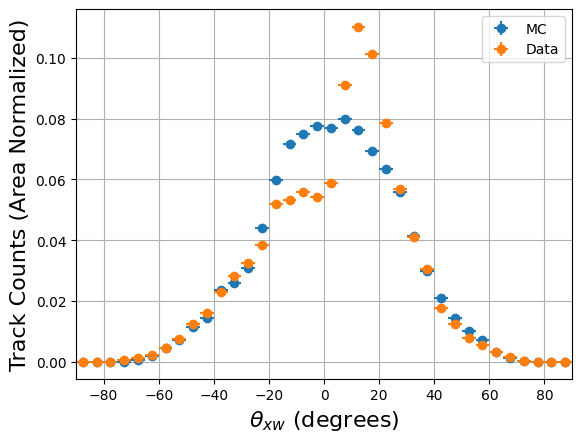

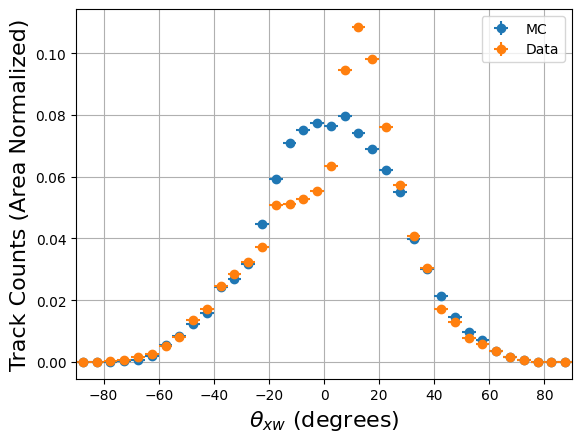

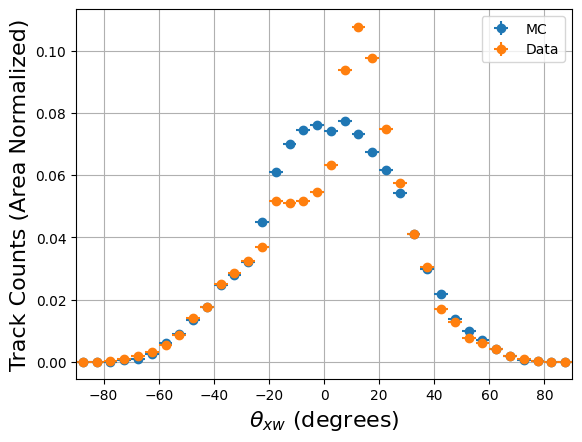

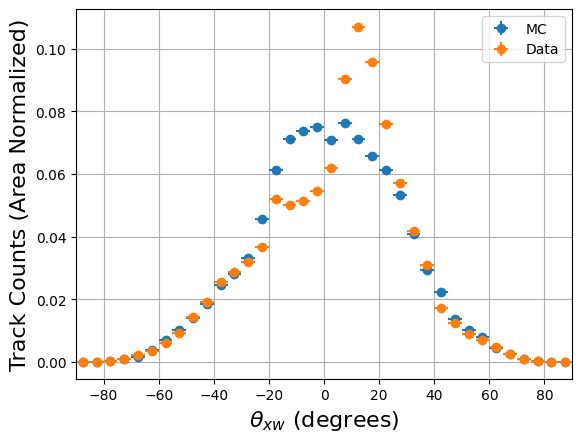

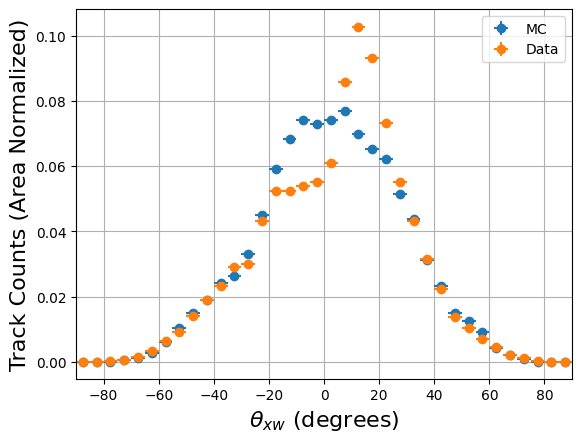

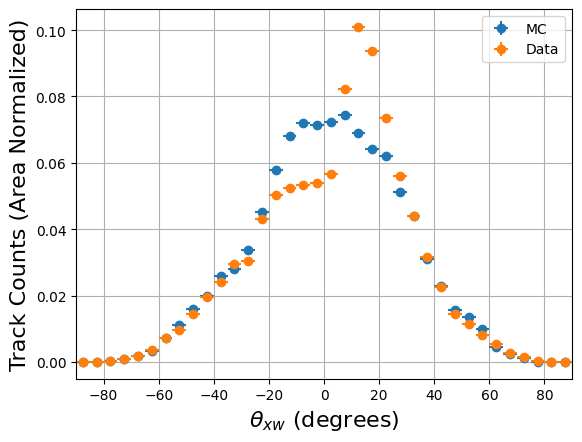

Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential me

In [32]:
# Loop over the adaptive bins
count = 0
for bin in bin_tree:
    if count > 5:
        break
    idx = getattr(bin, "idx")
    x1, x2 = int(getattr(bin, "x1")), int(getattr(bin, "x2"))
    y1, y2 = int(getattr(bin, "y1")), int(getattr(bin, "y2"))

    # Get the full track hist for this TPC+Plane
    htrk_mc = rmc_file.Get("hTrack"+str(int(idx)))
    htrk_data = rdata_file.Get("hTrack"+str(int(idx)))

    htrk_mc.GetAxis(0).SetRange(x1, x2)
    htrk_mc.GetAxis(1).SetRange(y1, y2)

    htrk_data.GetAxis(0).SetRange(x1, x2)
    htrk_data.GetAxis(1).SetRange(y1, y2)  

    h_theta_mc = htrk_mc.Projection(2)
    h_theta_data = htrk_data.Projection(2)

    x, y, w = get_bin_centers(h_theta_mc), get_bin_content(h_theta_mc), get_bin_width(h_theta_mc)
    N = np.sum(y)
    plt.errorbar(x, y/N, xerr=w/2, yerr=np.sqrt(y)/N, fmt='o', label='MC')

    x, y, w = get_bin_centers(h_theta_data), get_bin_content(h_theta_data), get_bin_width(h_theta_data)
    N = np.sum(y)
    plt.errorbar(x, y/N, xerr=w/2, yerr=np.sqrt(y)/N, fmt='o', label='Data')

    plt.xlabel(r'$\theta_{xw}$ (degrees)', fontsize=16)
    plt.ylabel('Track Counts (Area Normalized)', fontsize=16)
    plt.xlim(-90, 90)
    plt.grid()
    plt.legend()
    plt.show()

    count += 1

In [33]:
def plotYZ(isData, tpc, plane):
    h = 0
    idx = 3*tpc + plane
    if isData:
        h = rdata_file.Get("hTrack"+str(idx))
    else:
        h = rmc_file.Get("hTrack"+str(idx))
    hproj = h.Projection(0, 1)
    hproj.GetXaxis().SetTitle("Reconstructed Z [cm]")
    hproj.GetYaxis().SetTitle("Reconstructed Y [cm]")
    T = ""
    if isData:
        T = f"Data (v10_06_00_09): TPC {tpc}, Plane {plane}"
    else:
        T = f"MC (v10_06_00_09): TPC {tpc}, Plane {plane}"
    hproj.SetTitle(T)
    hproj.SetStats(0)
    return hproj


In [34]:
TPC = 0
PLANE = 0

hmc = plotYZ(False, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c0 = ROOT.TCanvas("c0", "c0", 700, 500)
#c.SetLogz()
hmc.Draw("Colz")
c0.Draw()
c0.SaveAs(Figure_Dir+f"tracks_yz_mc_tpc{TPC}_plane{PLANE}.pdf")

h = plotYZ(True, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c = ROOT.TCanvas("c", "c", 700, 500)
#c.SetLogz()
h.Draw("Colz")
c.Draw()
c.SaveAs(Figure_Dir+f"tracks_yz_data_tpc{TPC}_plane{PLANE}.pdf")

del hmc
del h



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_mc_tpc0_plane0.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_1_0 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_data_tpc0_plane0.pdf has been created


In [35]:
# Try plotting with matplotlib instead

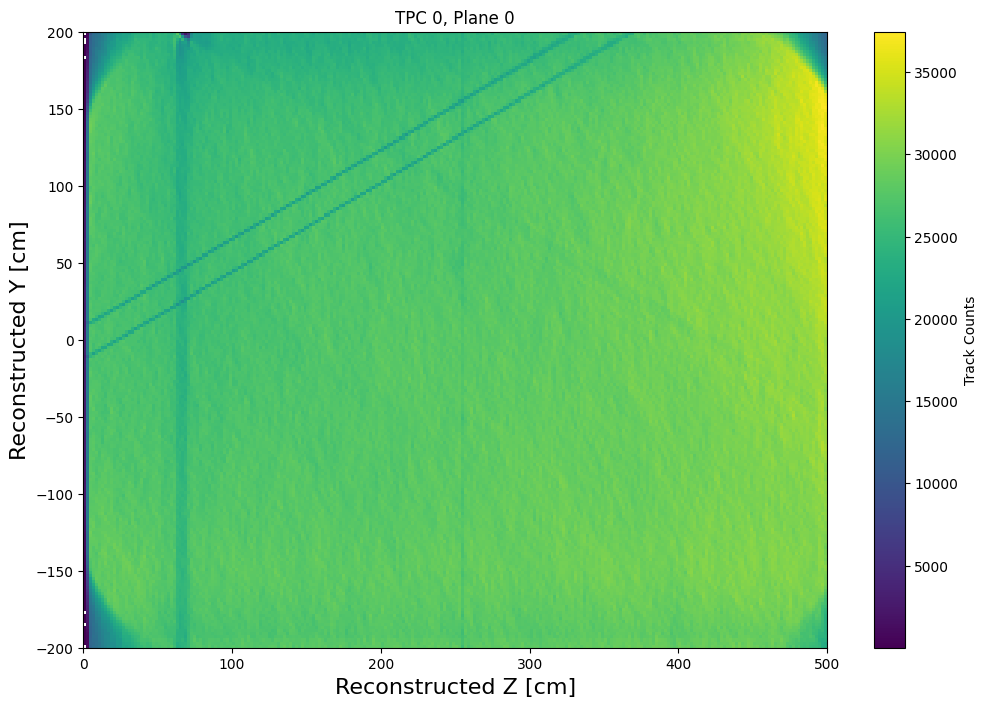

In [ ]:
TPC = 0
PLANE = 0

hmc = plotYZ(False, TPC, PLANE)

fig, axs = plt.subplots(1, 1, figsize=(12, 8), sharey=True) 

x_edges, y_edges, z_values = root_th2d_to_plt_hist2d(hmc)
z_masked = np.ma.masked_where(z_values == 0, z_values)
cmap = plt.cm.viridis.copy()
cmap.set_bad(color='white')

X, Y = np.meshgrid(x_edges, y_edges, indexing='ij')  # Needed for pcolormesh
#pcm = axs.pcolormesh(X, Y, z_masked, cmap=cmap, shading='auto', vmin=zlim[0], vmax=zlim[1])
pcm = axs.pcolormesh(X, Y, z_masked, cmap=cmap, shading='auto')

fig.colorbar(pcm, ax=axs, label="Track Counts") 
axs.set_title(f"MC (v10_06_00_09): TPC {tpc}, Plane {plane}")     
hmc.Delete()

axs.set_xlabel("Reconstructed Z [cm]", fontsize=16)
axs.set_ylabel("Reconstructed Y [cm]", fontsize=16)   
axs.set_xlim([0, 500])
axs.set_ylim([-200, 200])
plt.show()

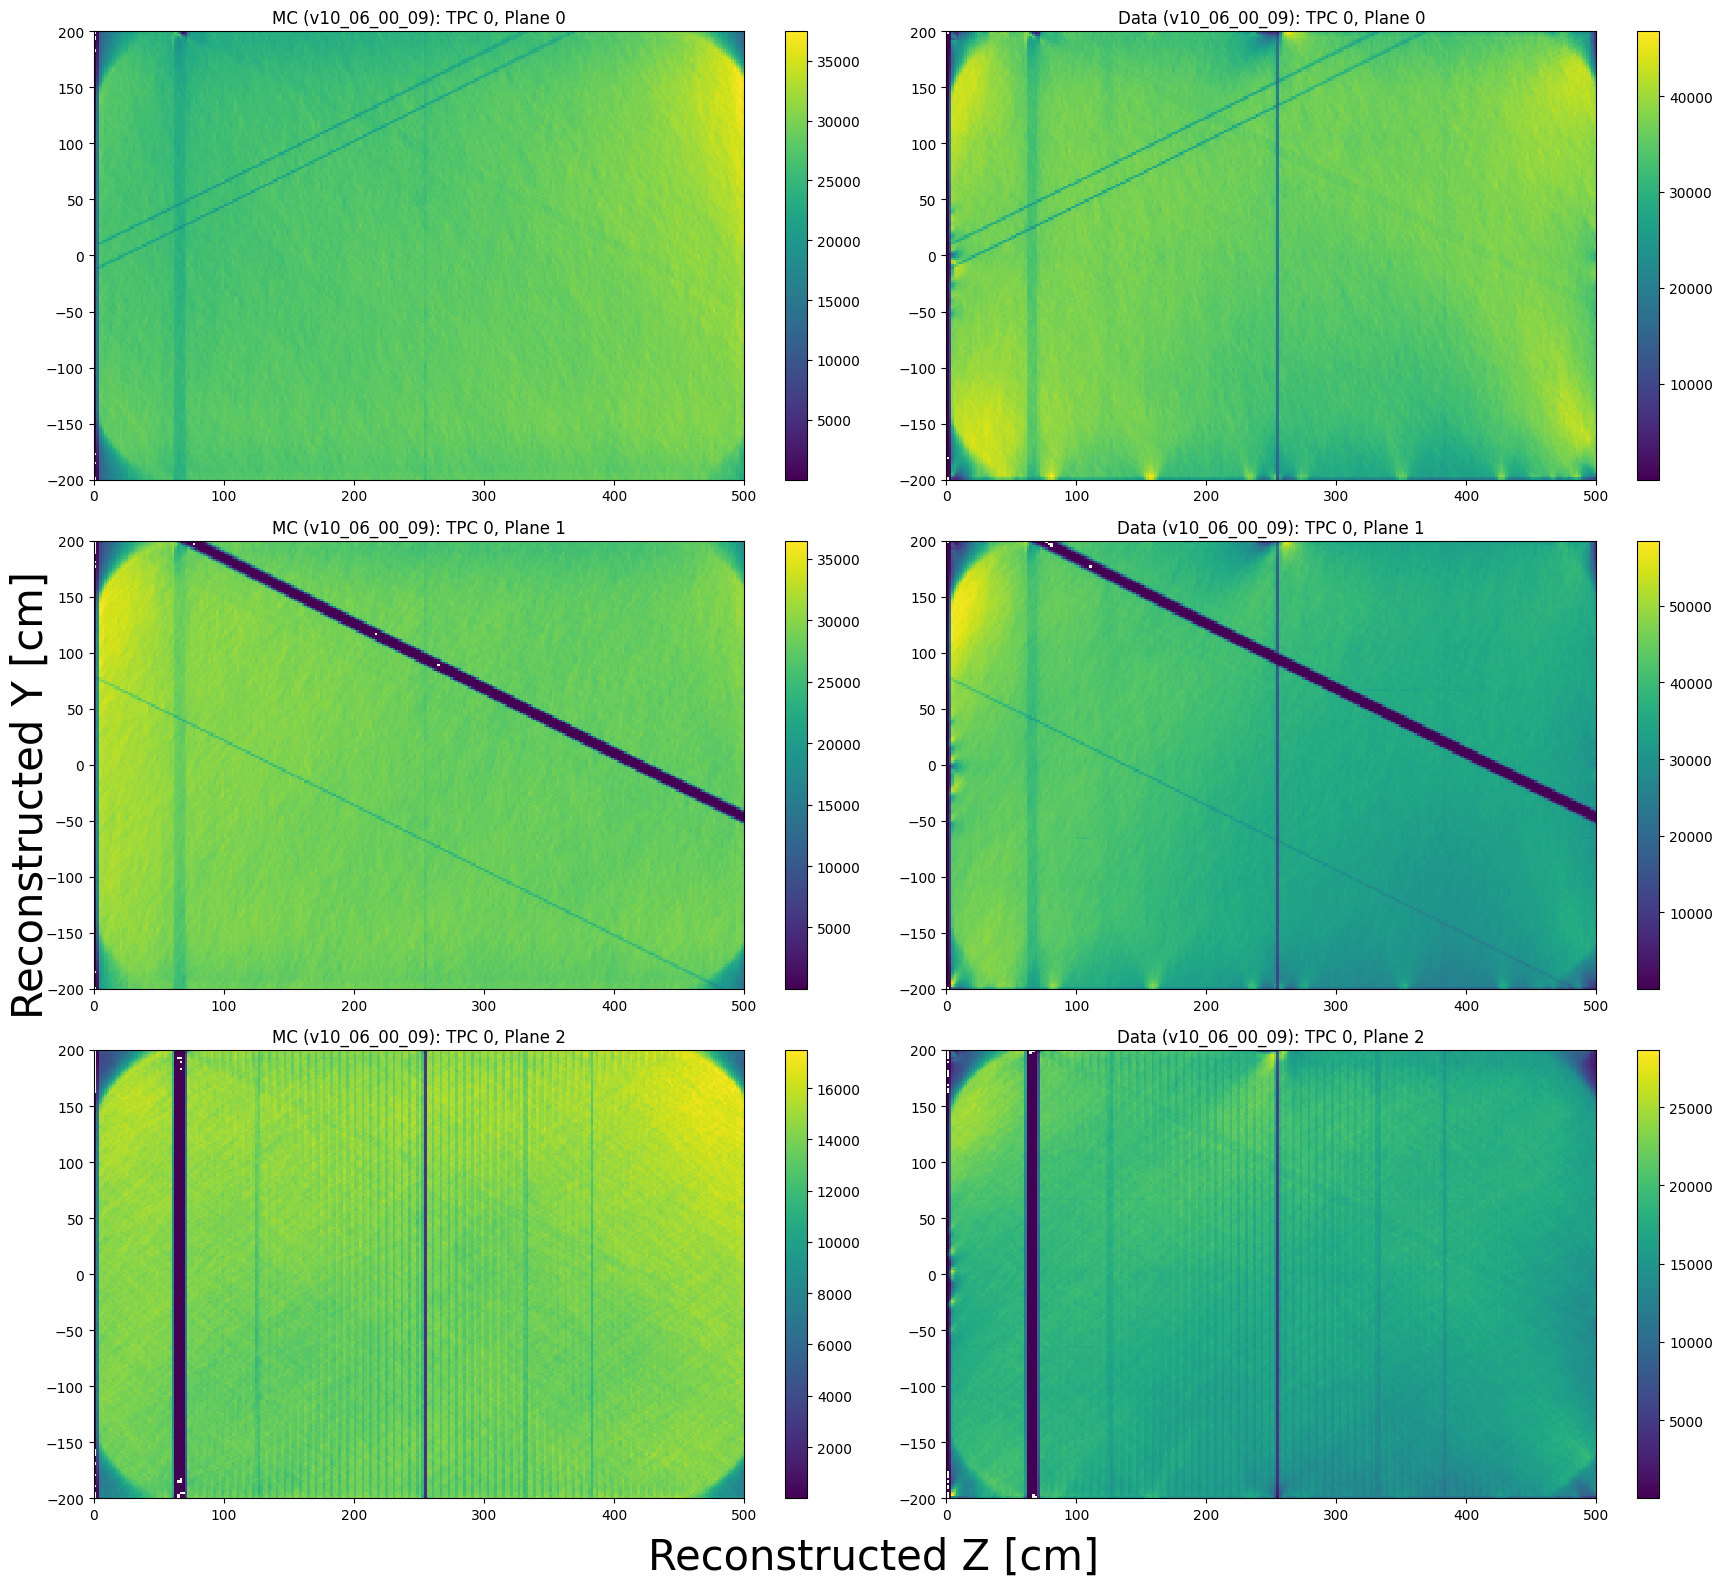

Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack1_proj_1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack2_proj_1_0 (Potential memory leak).


In [41]:
TPC = 0
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
for plane in range(3):
    #idx = 3*TPC + plane

    #fig, axes = plt.subplots(3, 2, figsize=(18, 16))
    hmc = plotYZ(False, TPC, plane)
    hd = plotYZ(True, TPC, plane)

    # MC First
    x_edges, y_edges, z_values = root_th2d_to_plt_hist2d(hmc)
    z_masked = np.ma.masked_where(z_values == 0, z_values)
    cmap = plt.cm.viridis.copy()
    cmap.set_bad(color='white')

    X, Y = np.meshgrid(x_edges, y_edges, indexing='ij')  # Needed for pcolormesh
    #pcm = axs.pcolormesh(X, Y, z_masked, cmap=cmap, shading='auto', vmin=zlim[0], vmax=zlim[1])
    pcm = axes[plane][0].pcolormesh(X, Y, z_masked, cmap=cmap, rasterized=True, shading='auto')

    fig.colorbar(pcm, ax=axes[plane][0]) 
    axes[plane][0].set_title(f"MC (v10_06_00_09): TPC {TPC}, Plane {plane}")     
    hmc.Delete()

    # Data Second
    x_edges, y_edges, z_values = root_th2d_to_plt_hist2d(hd)
    z_masked = np.ma.masked_where(z_values == 0, z_values)
    cmap = plt.cm.viridis.copy()
    cmap.set_bad(color='white')

    X, Y = np.meshgrid(x_edges, y_edges, indexing='ij')  # Needed for pcolormesh
    #pcm = axs.pcolormesh(X, Y, z_masked, cmap=cmap, shading='auto', vmin=zlim[0], vmax=zlim[1])
    pcm = axes[plane][1].pcolormesh(X, Y, z_masked, cmap=cmap, rasterized=True, shading='auto')

    fig.colorbar(pcm, ax=axes[plane][1]) 
    axes[plane][1].set_title(f"Data (v10_06_00_09): TPC {TPC}, Plane {plane}")     
    hd.Delete()

fig.supxlabel("Reconstructed Z [cm]", fontsize=30)
fig.supylabel('Reconstructed Y [cm]', fontsize=30)
plt.tight_layout()
plt.savefig(Figure_Dir + f"tracks_yz_east_tpc{TPC}_plane{plane}.png", bbox_inches="tight")
plt.show()


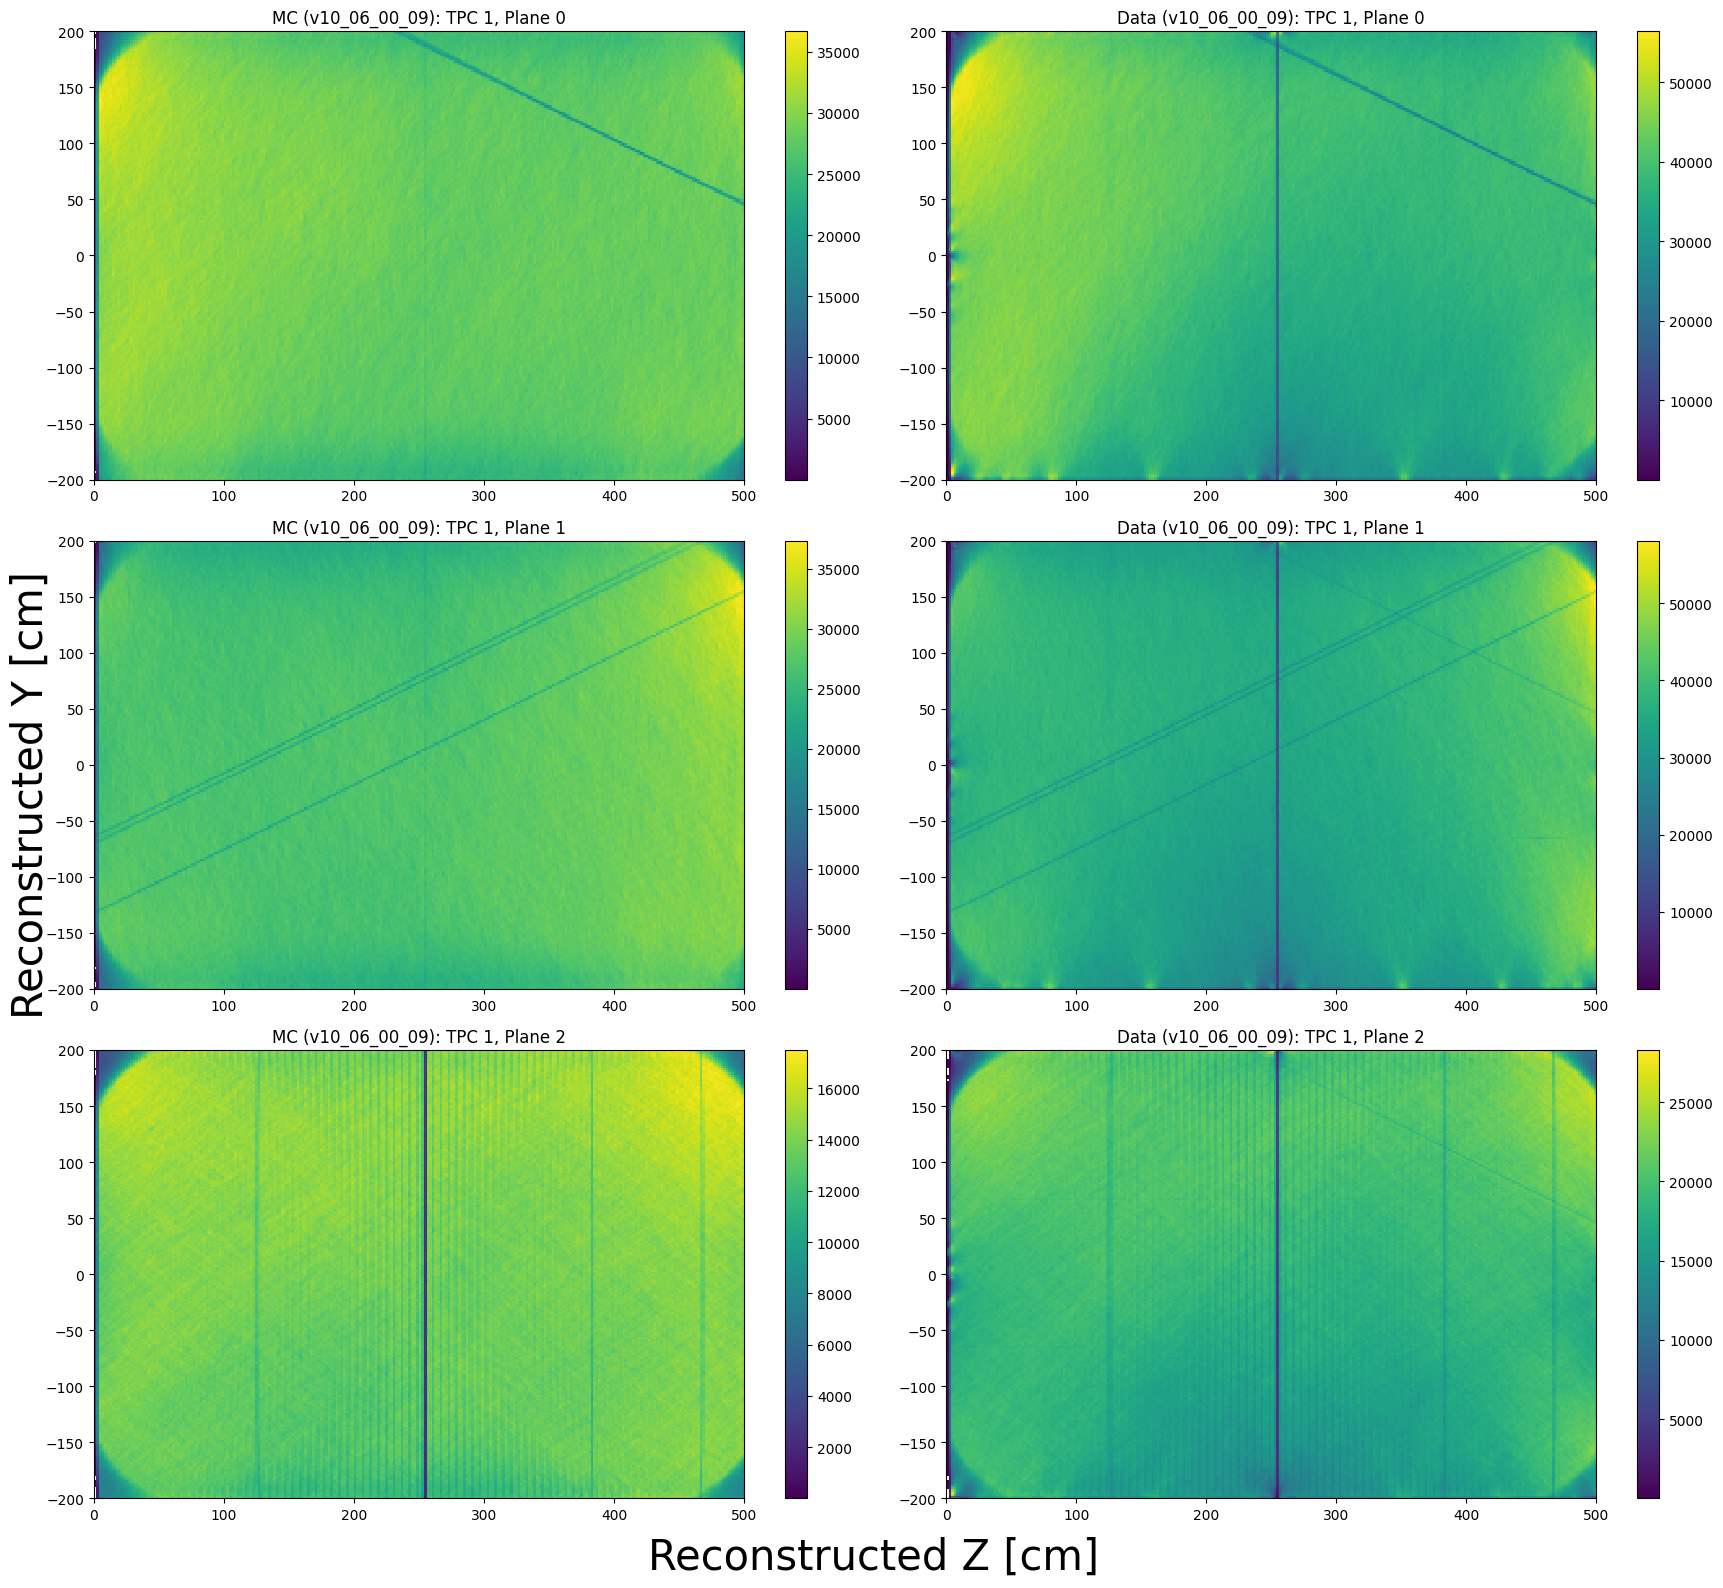

Warning in <TFile::Append>: Replacing existing TH1: hTrack3_proj_1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack4_proj_1_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack5_proj_1_0 (Potential memory leak).


In [42]:
TPC = 1
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
for plane in range(3):
    #idx = 3*TPC + plane

    #fig, axes = plt.subplots(3, 2, figsize=(18, 16))
    hmc = plotYZ(False, TPC, plane)
    hd = plotYZ(True, TPC, plane)

    # MC First
    x_edges, y_edges, z_values = root_th2d_to_plt_hist2d(hmc)
    z_masked = np.ma.masked_where(z_values == 0, z_values)
    cmap = plt.cm.viridis.copy()
    cmap.set_bad(color='white')

    X, Y = np.meshgrid(x_edges, y_edges, indexing='ij')  # Needed for pcolormesh
    #pcm = axs.pcolormesh(X, Y, z_masked, cmap=cmap, shading='auto', vmin=zlim[0], vmax=zlim[1])
    pcm = axes[plane][0].pcolormesh(X, Y, z_masked, cmap=cmap, rasterized=True, shading='auto')

    fig.colorbar(pcm, ax=axes[plane][0]) 
    axes[plane][0].set_title(f"MC (v10_06_00_09): TPC {TPC}, Plane {plane}")     
    hmc.Delete()

    # Data Second
    x_edges, y_edges, z_values = root_th2d_to_plt_hist2d(hd)
    z_masked = np.ma.masked_where(z_values == 0, z_values)
    cmap = plt.cm.viridis.copy()
    cmap.set_bad(color='white')

    X, Y = np.meshgrid(x_edges, y_edges, indexing='ij')  # Needed for pcolormesh
    #pcm = axs.pcolormesh(X, Y, z_masked, cmap=cmap, shading='auto', vmin=zlim[0], vmax=zlim[1])
    pcm = axes[plane][1].pcolormesh(X, Y, z_masked, cmap=cmap, rasterized=True, shading='auto')

    fig.colorbar(pcm, ax=axes[plane][1]) 
    axes[plane][1].set_title(f"Data (v10_06_00_09): TPC {TPC}, Plane {plane}")     
    hd.Delete()

fig.supxlabel("Reconstructed Z [cm]", fontsize=30)
fig.supylabel('Reconstructed Y [cm]', fontsize=30)
plt.tight_layout()
plt.savefig(Figure_Dir + f"tracks_yz_west_tpc{TPC}_plane{plane}.png", bbox_inches="tight")
plt.show()


In [ ]:
TPC = 0
PLANE = 1

hmc = plotYZ(False, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c0 = ROOT.TCanvas("c0", "c0", 700, 500)
#c.SetLogz()
hmc.Draw("Colz")
c0.Draw()
c0.SaveAs(Figure_Dir+f"tracks_yz_mc_tpc{TPC}_plane{PLANE}.pdf")

h = plotYZ(True, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c = ROOT.TCanvas("c", "c", 700, 500)
#c.SetLogz()
h.Draw("Colz")
c.Draw()
c.SaveAs(Figure_Dir+f"tracks_yz_data_tpc{TPC}_plane{PLANE}.pdf")

del hmc
del h

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_mc_tpc0_plane1.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: hTrack1_proj_1_0 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_data_tpc0_plane1.pdf has been created


In [ ]:
TPC = 0
PLANE = 2

hmc = plotYZ(False, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c0 = ROOT.TCanvas("c0", "c0", 700, 500)
#c.SetLogz()
hmc.Draw("Colz")
c0.Draw()
c0.SaveAs(Figure_Dir+f"tracks_yz_mc_tpc{TPC}_plane{PLANE}.pdf")

h = plotYZ(True, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c = ROOT.TCanvas("c", "c", 700, 500)
#c.SetLogz()
h.Draw("Colz")
c.Draw()
c.SaveAs(Figure_Dir+f"tracks_yz_data_tpc{TPC}_plane{PLANE}.pdf")

del hmc
del h


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_mc_tpc0_plane2.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: hTrack2_proj_1_0 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_data_tpc0_plane2.pdf has been created


In [ ]:
TPC = 1
PLANE = 0

hmc = plotYZ(False, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c0 = ROOT.TCanvas("c0", "c0", 700, 500)
#c.SetLogz()
hmc.Draw("Colz")
c0.Draw()
c0.SaveAs(Figure_Dir+f"tracks_yz_mc_tpc{TPC}_plane{PLANE}.pdf")

h = plotYZ(True, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c = ROOT.TCanvas("c", "c", 700, 500)
#c.SetLogz()
h.Draw("Colz")
c.Draw()
c.SaveAs(Figure_Dir+f"tracks_yz_data_tpc{TPC}_plane{PLANE}.pdf")

del hmc
del h

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_mc_tpc1_plane0.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: hTrack3_proj_1_0 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_data_tpc1_plane0.pdf has been created


In [ ]:
TPC = 1
PLANE = 1

hmc = plotYZ(False, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c0 = ROOT.TCanvas("c0", "c0", 700, 500)
#c.SetLogz()
hmc.Draw("Colz")
c0.Draw()
c0.SaveAs(Figure_Dir+f"tracks_yz_mc_tpc{TPC}_plane{PLANE}.pdf")

h = plotYZ(True, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c = ROOT.TCanvas("c", "c", 700, 500)
#c.SetLogz()
h.Draw("Colz")
c.Draw()
c.SaveAs(Figure_Dir+f"tracks_yz_data_tpc{TPC}_plane{PLANE}.pdf")

del hmc
del h

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_mc_tpc1_plane1.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: hTrack4_proj_1_0 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_data_tpc1_plane1.pdf has been created


In [ ]:
TPC = 1
PLANE = 2

hmc = plotYZ(False, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c0 = ROOT.TCanvas("c0", "c0", 700, 500)
#c.SetLogz()
hmc.Draw("Colz")
c0.Draw()
c0.SaveAs(Figure_Dir+f"tracks_yz_mc_tpc{TPC}_plane{PLANE}.pdf")

h = plotYZ(True, TPC, PLANE)
ROOT.gStyle.SetPalette(ROOT.kViridis)
c = ROOT.TCanvas("c", "c", 700, 500)
#c.SetLogz()
h.Draw("Colz")
c.Draw()
c.SaveAs(Figure_Dir+f"tracks_yz_data_tpc{TPC}_plane{PLANE}.pdf")

del hmc
del h

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_mc_tpc1_plane2.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: hTrack5_proj_1_0 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/tracks_yz_data_tpc1_plane2.pdf has been created


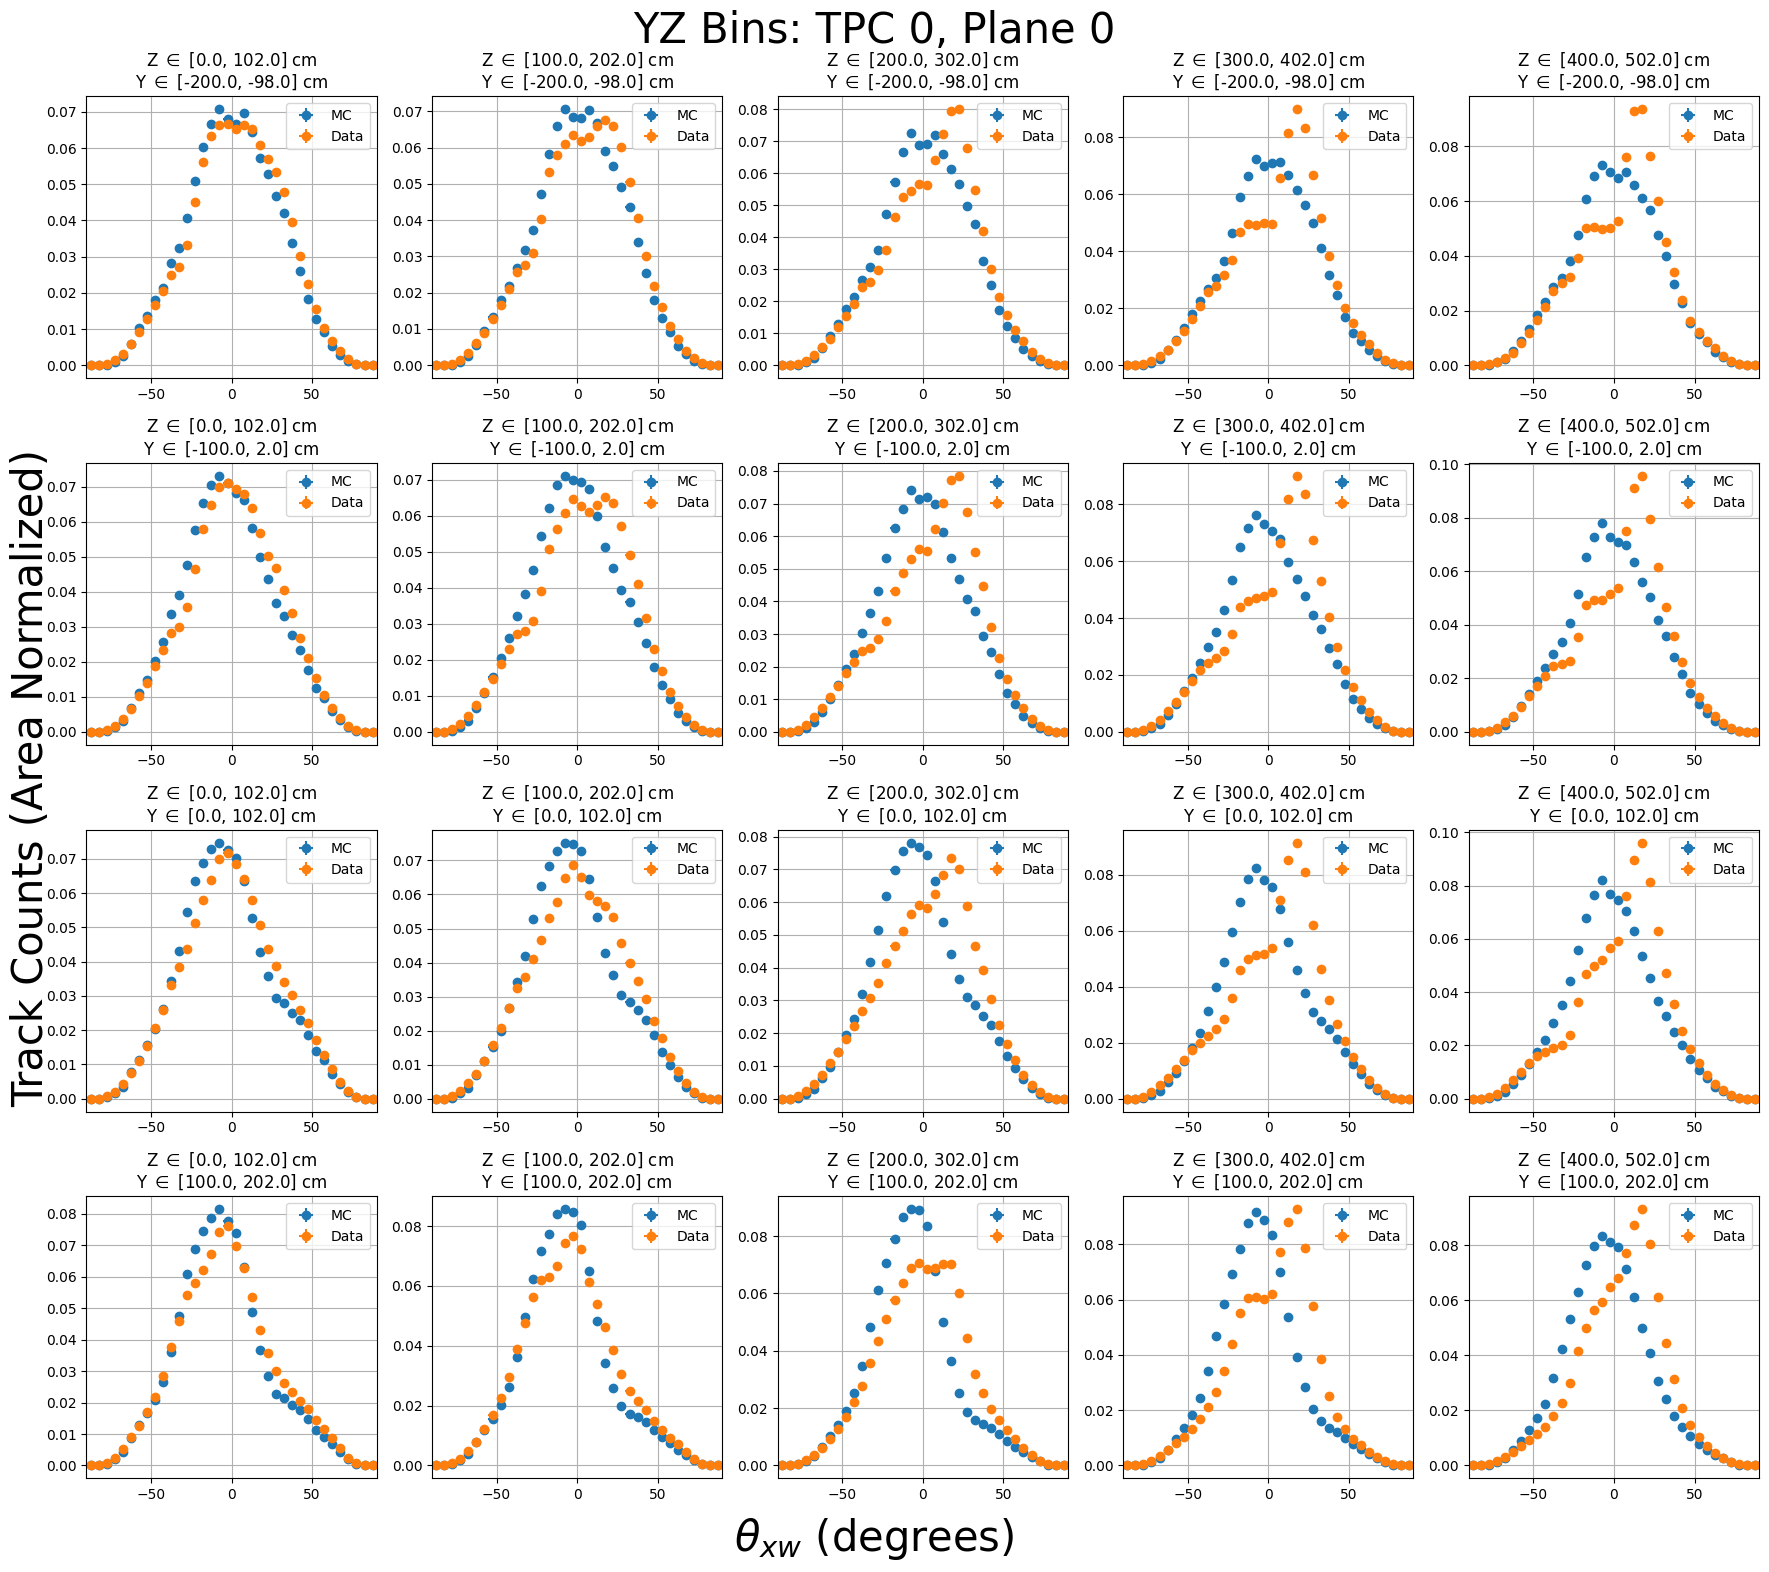

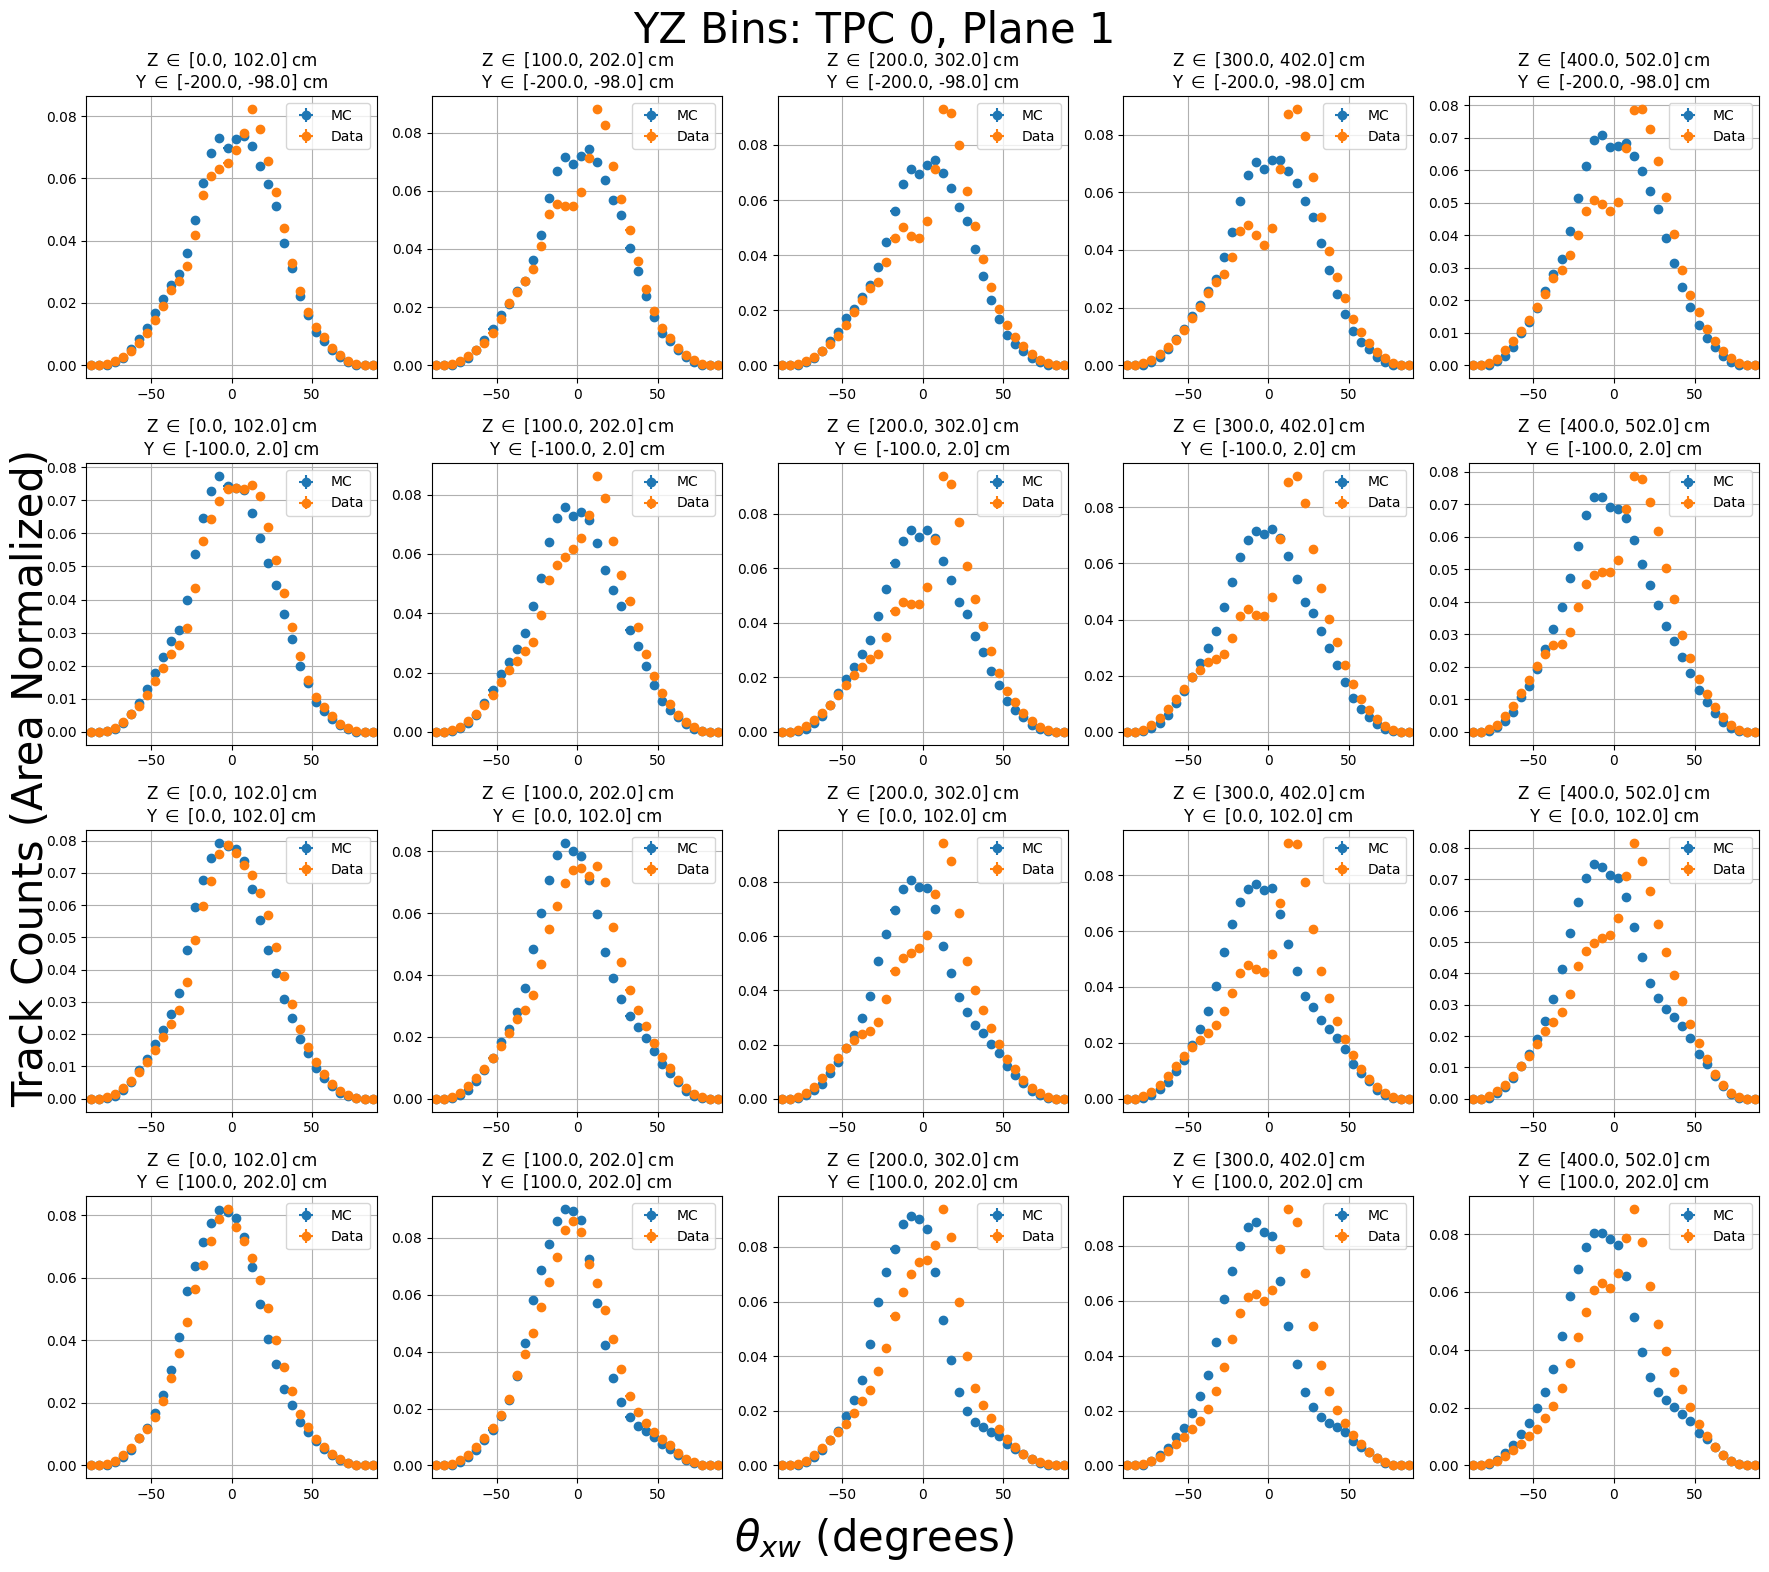

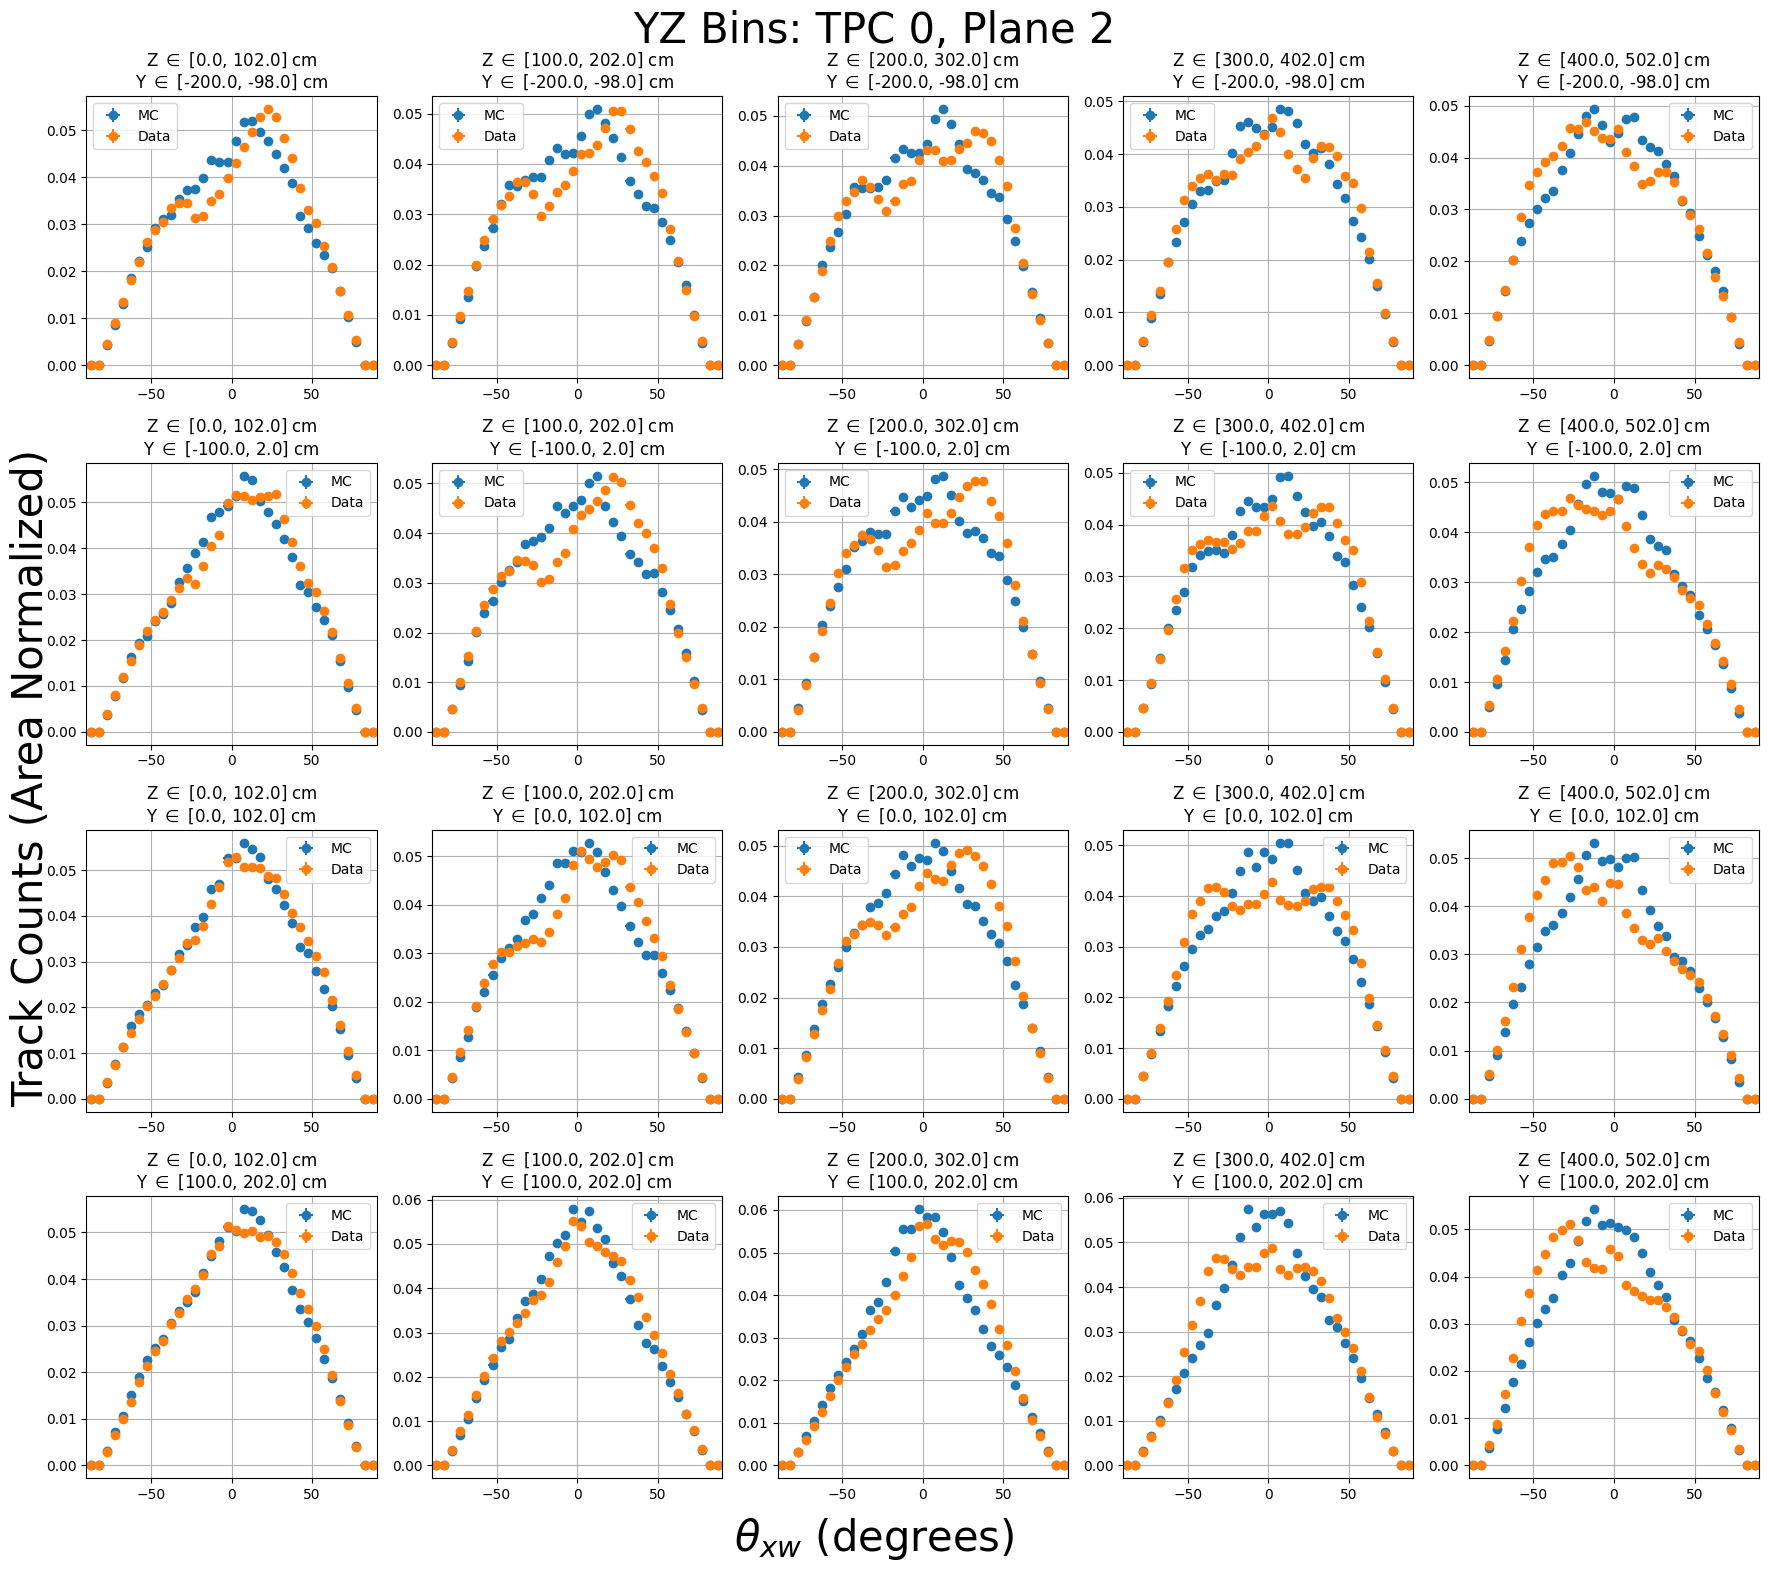

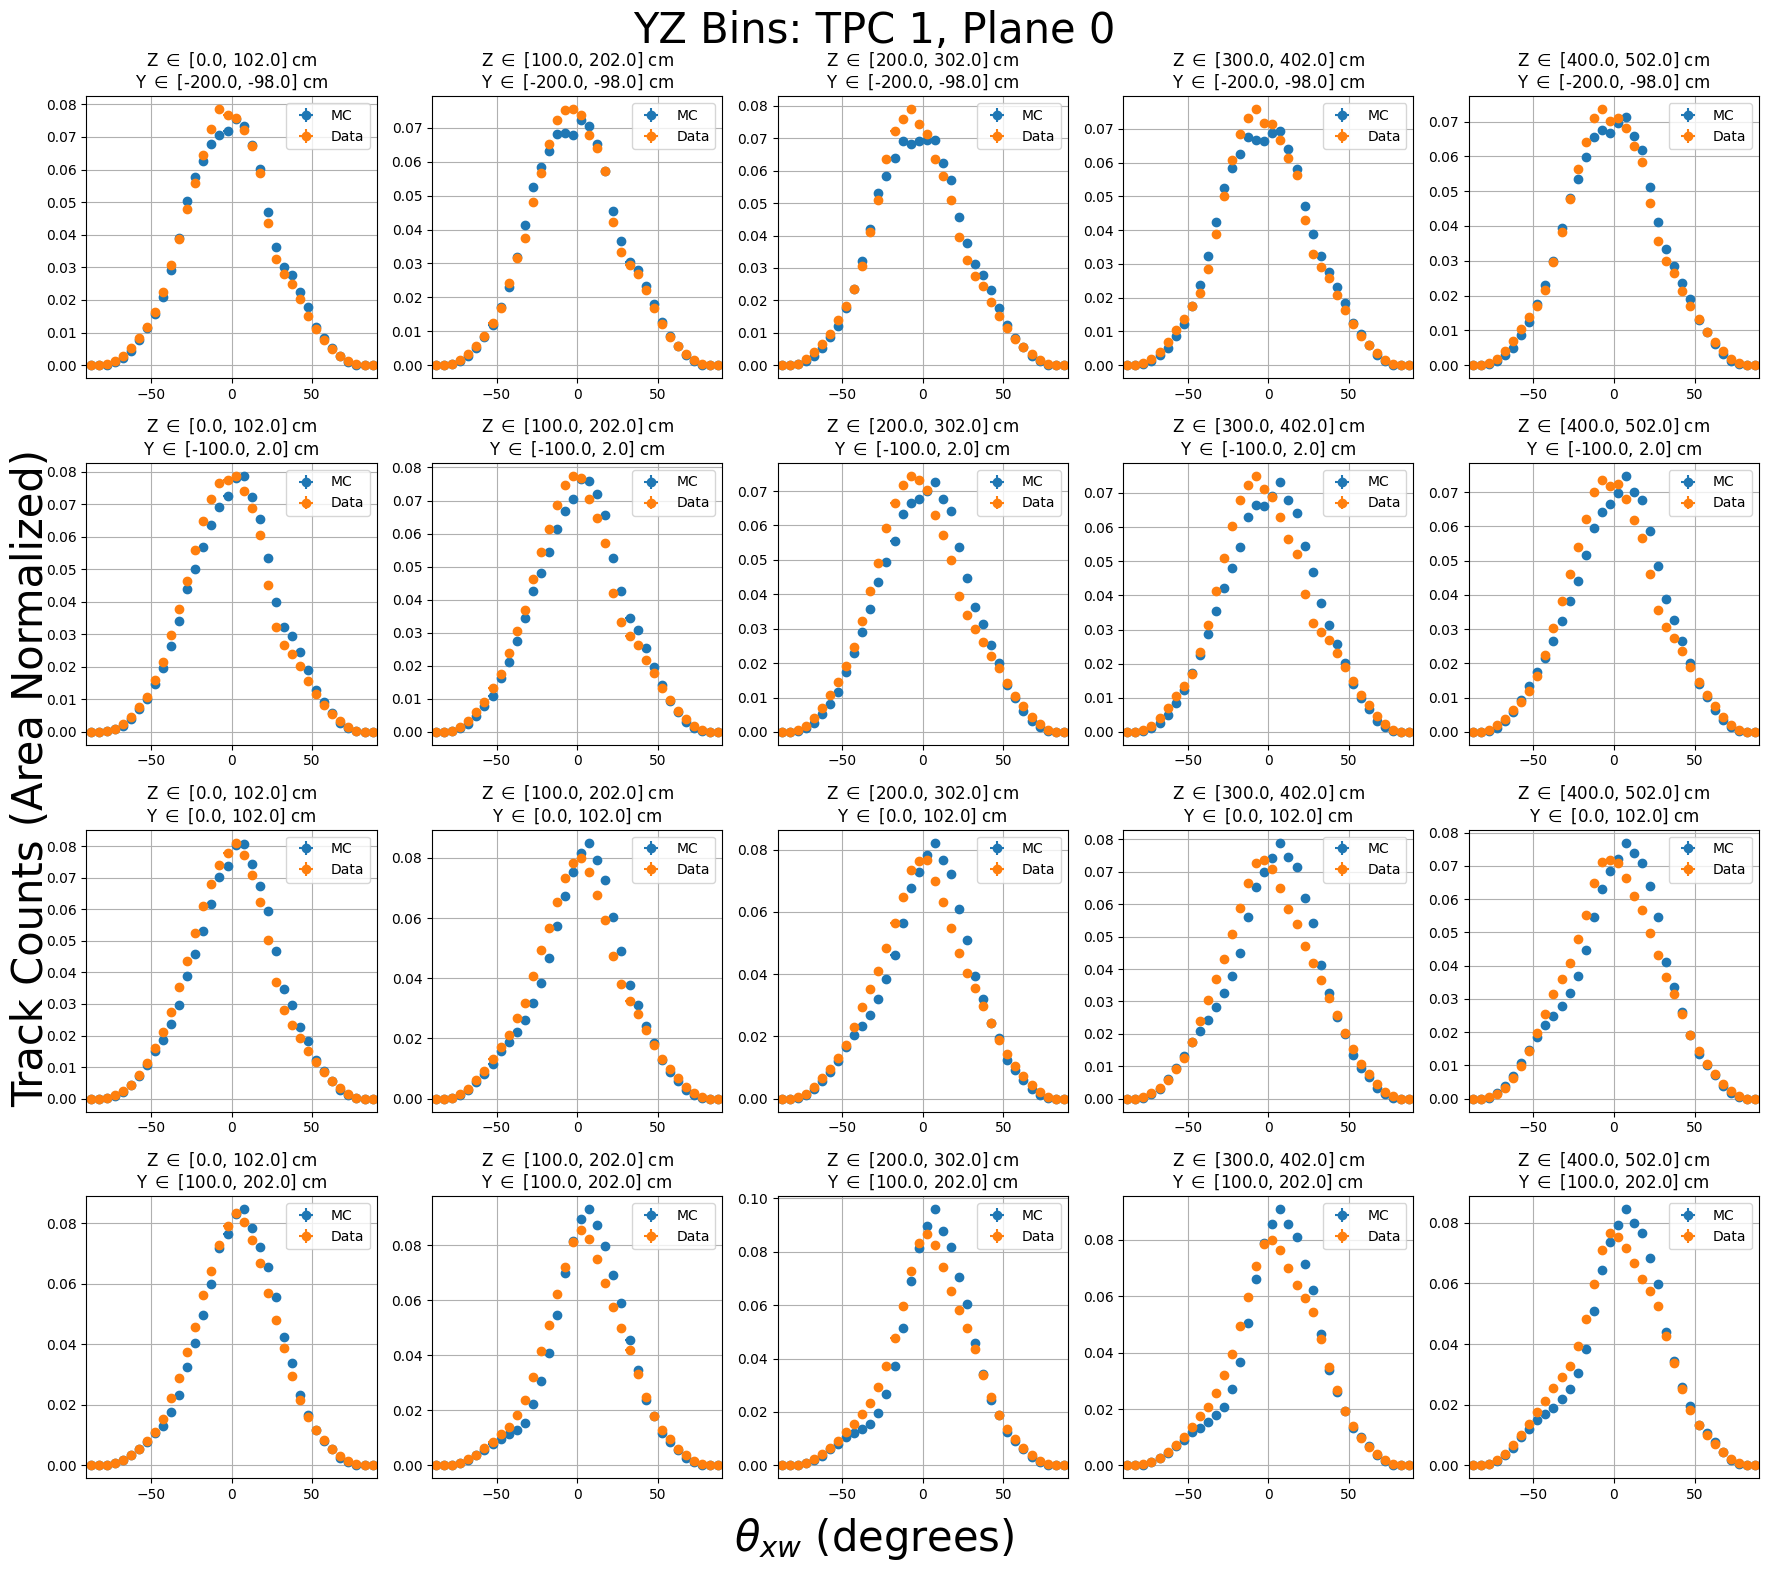

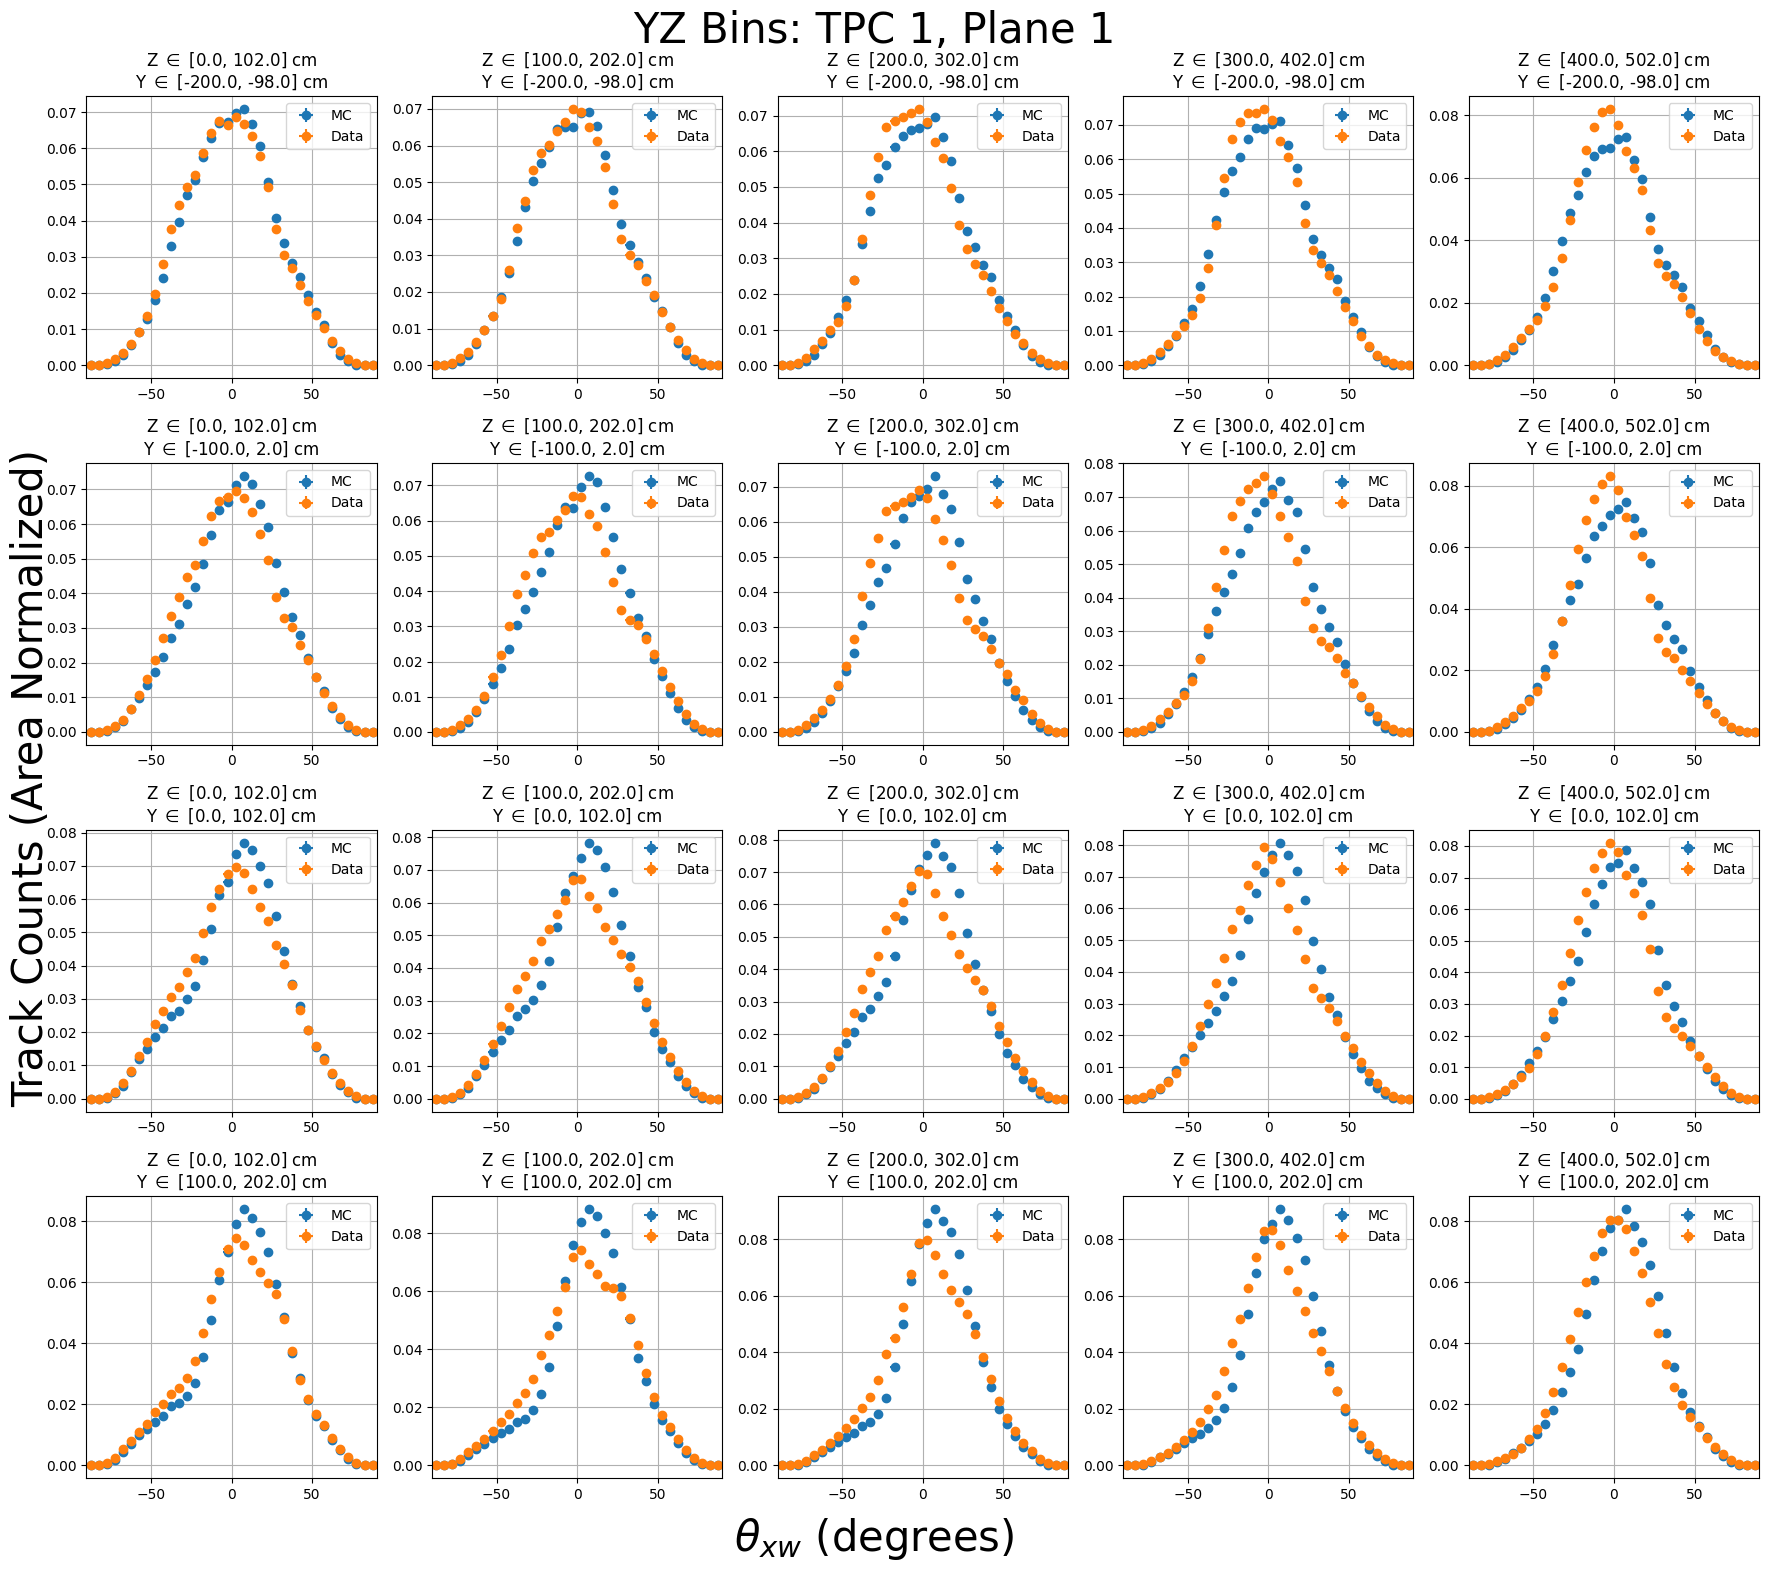

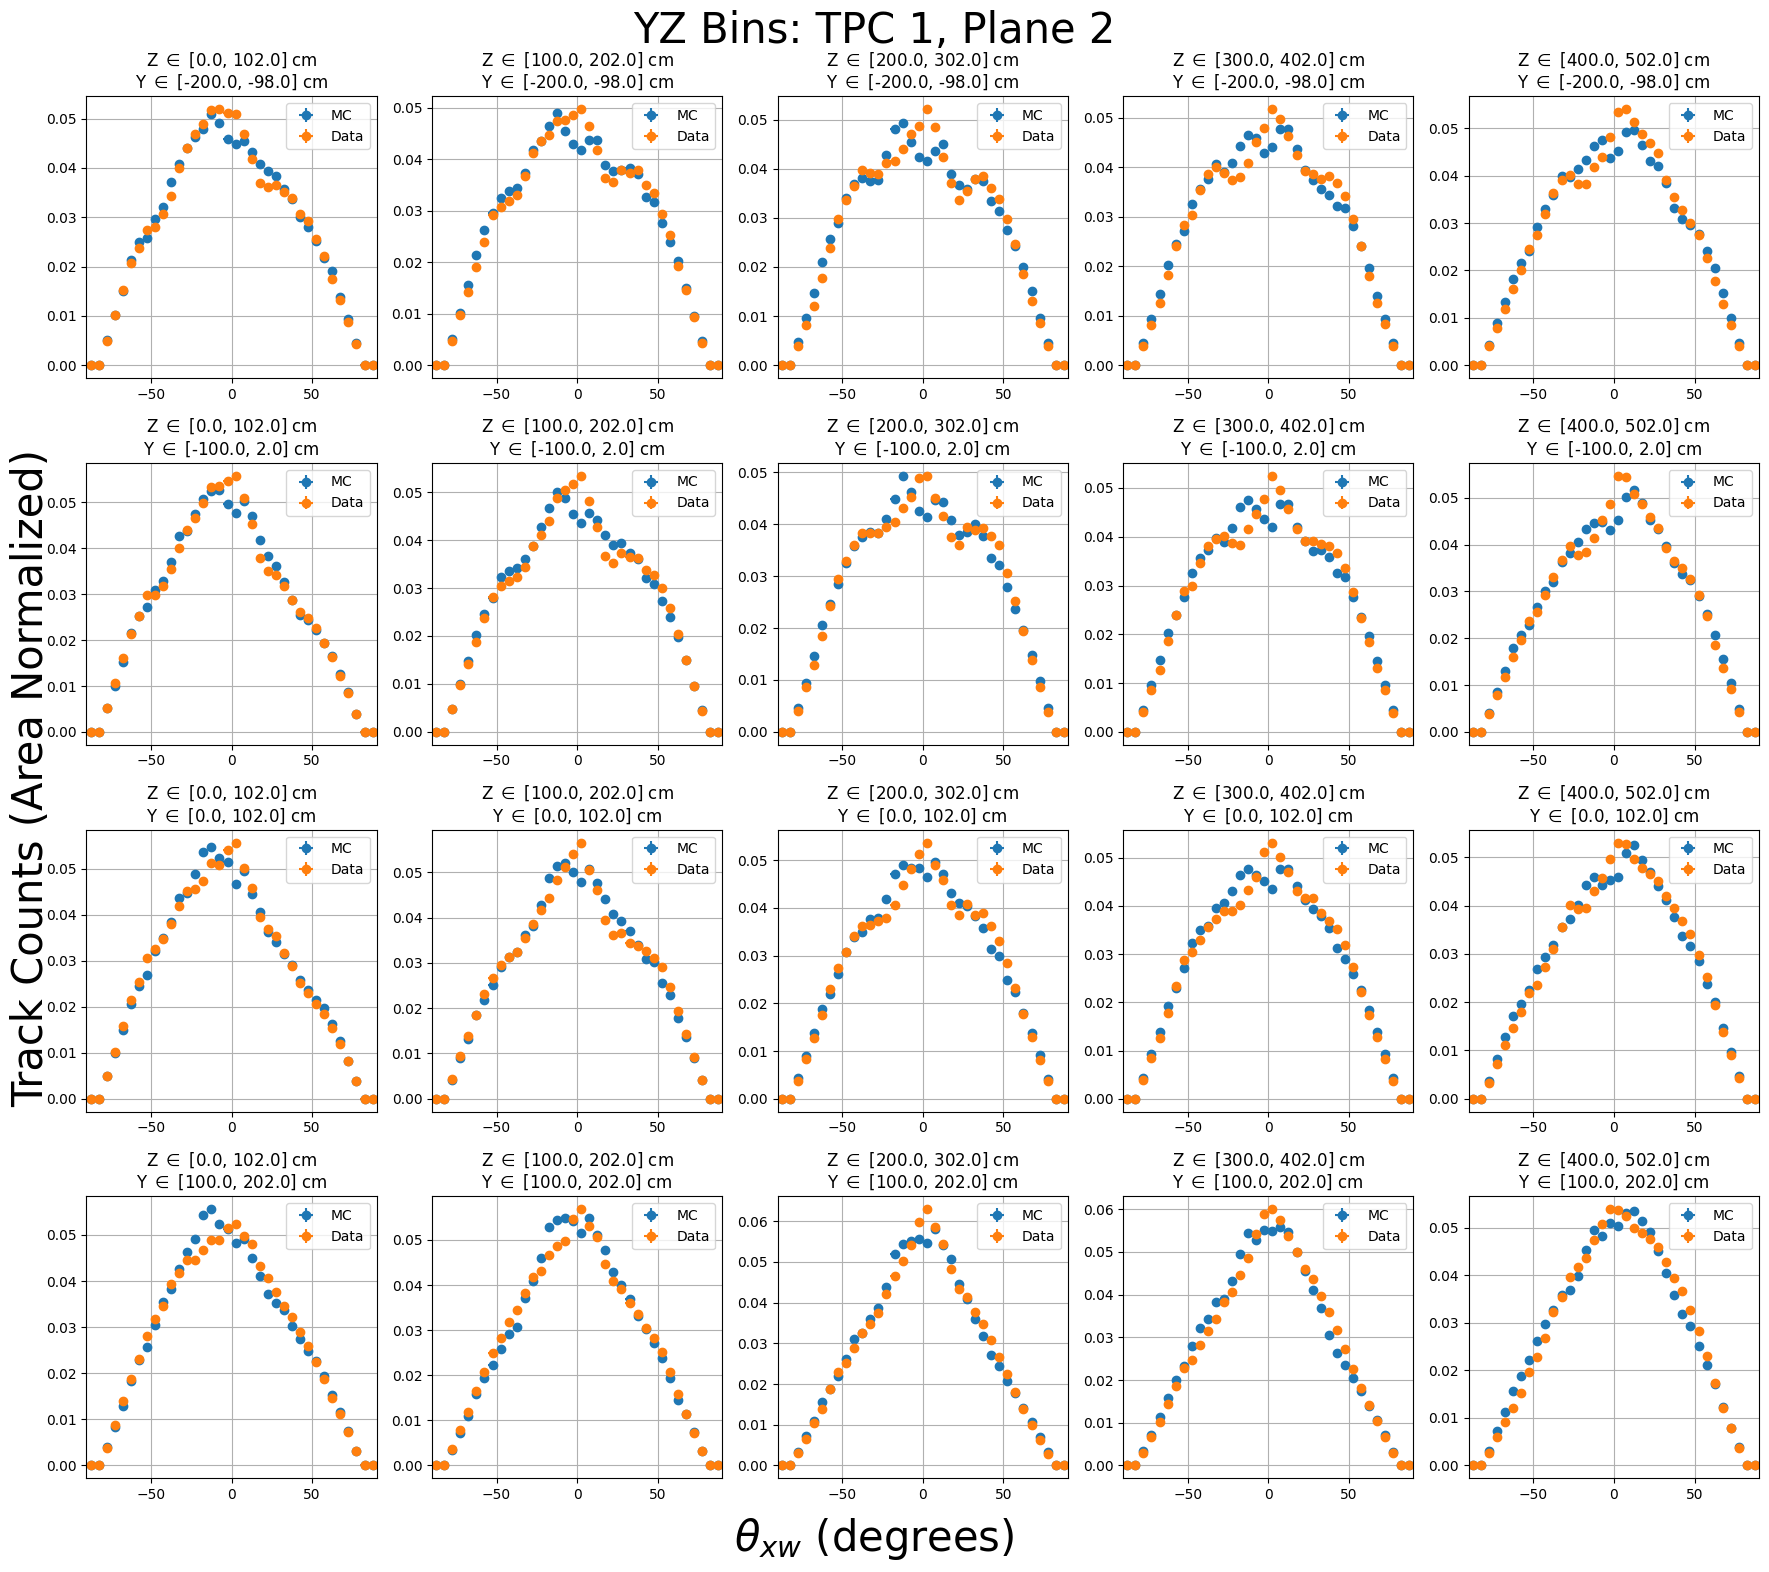

Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hTrack0_proj_2 (Potential me

In [ ]:
for tpc in range(2):
    for plane in range(3):
        idx = 3*tpc + plane

        fig, axes = plt.subplots(4, 5, figsize=(18, 16))

        # Get the full track hist for this TPC+Plane
        htrk_mc = rmc_file.Get("hTrack"+str(int(idx)))
        htrk_data = rdata_file.Get("hTrack"+str(int(idx)))

        NbinsZ = htrk_mc.GetAxis(1).GetNbins()
        NbinsY = htrk_mc.GetAxis(0).GetNbins()
        #print("NbinsY", NbinsY)
        #print("NbinsZ", NbinsZ)
        #dz = NbinsZ / 5
        #dy = NbinsZ / 4

        for iz in range(5):
            for iy in range(4):
                ax = axes[iy, iz]
                htrk_mc.GetAxis(0).SetRange(iy*50 + 1, iy*50 + 51)
                htrk_mc.GetAxis(1).SetRange(iz*50 + 1, iz*50 + 51)
                htrk_data.GetAxis(0).SetRange(iy*50 + 1, iy*50 + 51)
                htrk_data.GetAxis(1).SetRange(iz*50 + 1, iz*50 + 51)

                zmin = round(htrk_mc.GetAxis(1).GetBinLowEdge(iz*50 + 1), 2)
                zmax = round(htrk_mc.GetAxis(1).GetBinUpEdge(iz*50 + 51), 2)
                ymin = round(htrk_mc.GetAxis(0).GetBinLowEdge(iy*50 + 1), 2)
                ymax = round(htrk_mc.GetAxis(0).GetBinUpEdge(iy*50 + 51), 2)


                h_theta_mc = htrk_mc.Projection(2)
                h_theta_data = htrk_data.Projection(2)

                x, y, w = get_bin_centers(h_theta_mc), get_bin_content(h_theta_mc), get_bin_width(h_theta_mc)
                N = np.sum(y)
                ax.errorbar(x, y/N, xerr=w/2, yerr=np.sqrt(y)/N, fmt='o', label='MC')

                x, y, w = get_bin_centers(h_theta_data), get_bin_content(h_theta_data), get_bin_width(h_theta_data)
                N = np.sum(y)
                ax.errorbar(x, y/N, xerr=w/2, yerr=np.sqrt(y)/N, fmt='o', label='Data')
                ax.set_xlim(-90, 90)
                ax.set_title(rf"Z $\in$ [{zmin}, {zmax}] cm"+"\n"+rf"Y $\in$ [{ymin}, {ymax}] cm")
                ax.grid()
                ax.legend()
                #plt.show()

        fig.suptitle(f"YZ Bins: TPC {tpc}, Plane {plane}", fontsize=30)
        fig.supxlabel(r'$\theta_{xw}$ (degrees)', fontsize=30)
        fig.supylabel('Track Counts (Area Normalized)', fontsize=30)
        plt.tight_layout()
        plt.savefig(Figure_Dir + f"YZ_AngleStudy_TPC{tpc}_Plane{plane}_TrackCounts_theta_xw.png", bbox_inches="tight")
        plt.show()


# ITM MPV with Re-Weight

In [ ]:
# ITM Python Implementation
from array import array

def ITM(h, sig_down, sig_up, tol, result):

    mean = h.GetMean()
    sd = h.GetRMS()
    if abs(result[0] - mean) < tol:
        #return result
        return array('d', [mean, sd])
    
    # Report error on the mean
    err = sd / (h.Integral()**0.5)
    result[0] = mean
    result[1] = err

    median = array('d', [0.0])
    probs = array('d', [0.5])

    h.GetQuantiles(1, median, probs)

    hnew = h.Clone()
    hnew.Reset()
    for i in range(1, h.GetNbinsX()+1):
        x = h.GetBinCenter(i)
        if h.GetBinLowEdge(i) > median[0] + sig_up * sd or h.GetBinLowEdge(i) + h.GetBinWidth(i) < median[0] + sig_down * sd:
            continue
        hnew.SetBinContent(i, h.GetBinContent(i))
        hnew.SetBinError(i, h.GetBinError(i))

    ITM(hnew, sig_down, sig_up, tol, result)

In [ ]:
fd = DATA_DIR + "WIRE_HIST_DATA_YZQ_v09_Merge_Full.root"
fm = DATA_DIR + "WIRE_HIST_MC_YZQ_v09_Merge_Full.root"

rdata_q_file = ROOT.TFile.Open(fd, "READ")
rmc_q_file = ROOT.TFile.Open(fm, "READ")


rdata_q_file.ls()

TFile**		/Users/alexanderantonakis/WireModProd2Data/YZTxwStudy/WIRE_HIST_DATA_YZQ_v09_Merge_Full.root	
 TFile*		/Users/alexanderantonakis/WireModProd2Data/YZTxwStudy/WIRE_HIST_DATA_YZQ_v09_Merge_Full.root	
  KEY: THnSparseT<TArrayD>	hHit0;1	 projection  projection yzQ
  KEY: THnSparseT<TArrayD>	hTrack0;1	 projection  projection yzQ
  KEY: THnSparseT<TArrayD>	hHit1;1	 projection  projection yzQ
  KEY: THnSparseT<TArrayD>	hTrack1;1	 projection  projection yzQ
  KEY: THnSparseT<TArrayD>	hHit2;1	 projection  projection yzQ
  KEY: THnSparseT<TArrayD>	hTrack2;1	 projection  projection yzQ
  KEY: THnSparseT<TArrayD>	hHit3;1	 projection  projection yzQ
  KEY: THnSparseT<TArrayD>	hTrack3;1	 projection  projection yzQ
  KEY: THnSparseT<TArrayD>	hHit4;1	 projection  projection yzQ
  KEY: THnSparseT<TArrayD>	hTrack4;1	 projection  projection yzQ
  KEY: THnSparseT<TArrayD>	hHit5;1	 projection  projection yzQ
  KEY: THnSparseT<TArrayD>	hTrack5;1	 projection  projection yzQ


In [ ]:
def get_weights(idx, z1, z2, y1, y2):
    htrk_mc = rmc_file.Get("hTrack"+str(int(idx)))
    htrk_data = rdata_file.Get("hTrack"+str(int(idx)))

    htrk_mc.GetAxis(0).SetRange(y1, y2)
    htrk_mc.GetAxis(1).SetRange(z1, z2)
    htrk_data.GetAxis(0).SetRange(y1, y2)
    htrk_data.GetAxis(1).SetRange(z1, z2)

    h_theta_mc = htrk_mc.Projection(2)
    h_theta_data = htrk_data.Projection(2)

    x, y, w = get_bin_centers(h_theta_mc), get_bin_content(h_theta_mc), get_bin_width(h_theta_mc)
    N = np.sum(y)
    
    xd, yd, wd = get_bin_centers(h_theta_data), get_bin_content(h_theta_data), get_bin_width(h_theta_data)
    Nd = np.sum(yd)
    return (yd/Nd)/(y/N)

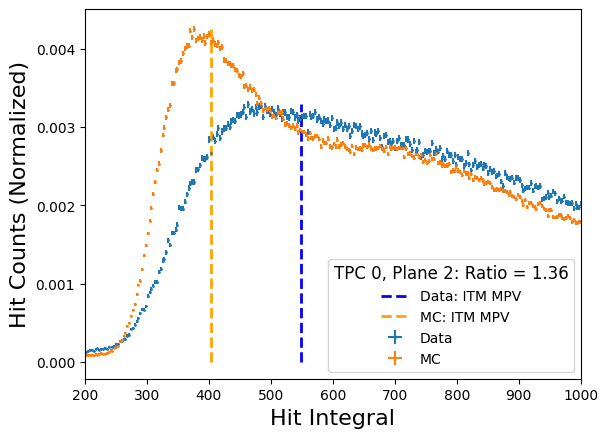

Warning in <TFile::Append>: Replacing existing TH1: hHit2_proj_2 (Potential memory leak).


In [ ]:
# investigate outliers

tpc = 0
plane = 2
idx = tpc * 3 + plane

hm = rmc_q_file.Get("hHit"+str(idx))
hd = rdata_q_file.Get("hHit"+str(idx))


bin1_y = hm.GetAxis(0).FindBin(175)
bin2_y = hm.GetAxis(0).FindBin(200)

bin1_z = hm.GetAxis(1).FindBin(475)
bin2_z = hm.GetAxis(1).FindBin(500)

#xmin = hm.GetAxis(1).GetBinLowEdge(bin1)
#xmax = hm.GetAxis(1).GetBinLowEdge(bin2) + hm.GetAxis(1).GetBinWidth(bin2)

hm.GetAxis(0).SetRange(bin1_y, bin2_y)
hd.GetAxis(0).SetRange(bin1_y, bin2_y)

hm.GetAxis(1).SetRange(bin1_z, bin2_z)
hd.GetAxis(1).SetRange(bin1_z, bin2_z)

hmq = hm.Projection(2)
hdq = hd.Projection(2)

result = array('d', [0.0, 0.0])
ITM(hmq, -2.0, 1.75, 1e-4, result)

mean_m = result[0]

result = array('d', [0.0, 0.0])
ITM(hdq, -2.0, 1.75, 1e-4, result)

mean_d = result[0]

r = mean_d / mean_m

xd = get_bin_centers(hdq)
yd = get_bin_content(hdq)
wd = get_bin_width(hdq)

xm = get_bin_centers(hmq)
ym = get_bin_content(hmq)
wm = get_bin_width(hmq)

Nd= np.sum(yd)
Nm= np.sum(ym)
plt.errorbar(xd, yd/Nd, xerr=wd/2, yerr=np.sqrt(yd)/Nd, fmt='o', markersize=1, label='Data') 
plt.errorbar(xm, ym/Nm, xerr=wm/2, yerr=np.sqrt(ym)/Nm, fmt='o', markersize=1, label='MC')
plt.plot([mean_d, mean_d], [0, max(yd/Nd)], '--', linewidth=2, label='Data: ITM MPV', c='b')
plt.plot([mean_m, mean_m], [0, max(ym/Nm)], '--', linewidth=2, label='MC: ITM MPV', c='orange')
plt.xlabel('Hit Integral', fontsize=16) 
plt.ylabel('Hit Counts (Normalized)', fontsize=16)
plt.legend(title=f'TPC {tpc}, Plane {plane}: Ratio = {r:.2f}', fontsize=10, title_fontsize=12)
#plt.title(fr'$\theta_{{yz}}$ Range: [{xmin:.2f}, {xmax:.2f}] degrees', fontsize=12)
plt.xlim(200, 1000)
#plt.savefig(Figure_Dir + f"Outlier_AngleYZ_{count}_TPC{tpc}_Plane{plane}_HitIntegral_Comparison.png", bbox_inches="tight")
plt.show()

hm.Delete()
hd.Delete()

In [ ]:
# investigate outliers
"""
tpc = 0
plane = 2
idx = tpc * 3 + plane

hm = rmc_q_file.Get("hHit"+str(idx))
hd = rdata_q_file.Get("hHit"+str(idx))


bin1_y = hm.GetAxis(0).FindBin(175)
bin2_y = hm.GetAxis(0).FindBin(200)

bin1_z = hm.GetAxis(1).FindBin(475)
bin2_z = hm.GetAxis(1).FindBin(500)

r = get_weights(idx, bin1_z, bin2_z, bin1_y, bin2_y)

#xmin = hm.GetAxis(1).GetBinLowEdge(bin1)
#xmax = hm.GetAxis(1).GetBinLowEdge(bin2) + hm.GetAxis(1).GetBinWidth(bin2)

hm.GetAxis(0).SetRange(bin1_y, bin2_y)
hd.GetAxis(0).SetRange(bin1_y, bin2_y)

hm.GetAxis(1).SetRange(bin1_z, bin2_z)
hd.GetAxis(1).SetRange(bin1_z, bin2_z)

#hmq2d = hm.Projection()

hmq = hm.Projection(2)
hdq = hd.Projection(2)

result = array('d', [0.0, 0.0])
ITM(hmq, -2.0, 1.75, 1e-4, result)

mean_m = result[0]

result = array('d', [0.0, 0.0])
ITM(hdq, -2.0, 1.75, 1e-4, result)

mean_d = result[0]

r = mean_d / mean_m

xd = get_bin_centers(hdq)
yd = get_bin_content(hdq)
wd = get_bin_width(hdq)

xm = get_bin_centers(hmq)
ym = get_bin_content(hmq)
wm = get_bin_width(hmq)

Nd= np.sum(yd)
Nm= np.sum(ym)
plt.errorbar(xd, yd/Nd, xerr=wd/2, yerr=np.sqrt(yd)/Nd, fmt='o', markersize=1, label='Data') 
plt.errorbar(xm, ym/Nm, xerr=wm/2, yerr=np.sqrt(ym)/Nm, fmt='o', markersize=1, label='MC')
plt.plot([mean_d, mean_d], [0, max(yd/Nd)], '--', linewidth=2, label='Data: ITM MPV', c='b')
plt.plot([mean_m, mean_m], [0, max(ym/Nm)], '--', linewidth=2, label='MC: ITM MPV', c='orange')
plt.xlabel('Hit Integral', fontsize=16) 
plt.ylabel('Hit Counts (Normalized)', fontsize=16)
plt.legend(title=f'TPC {tpc}, Plane {plane}: Ratio = {r:.2f}', fontsize=10, title_fontsize=12)
#plt.title(fr'$\theta_{{yz}}$ Range: [{xmin:.2f}, {xmax:.2f}] degrees', fontsize=12)
plt.xlim(200, 1000)
#plt.savefig(Figure_Dir + f"Outlier_AngleYZ_{count}_TPC{tpc}_Plane{plane}_HitIntegral_Comparison.png", bbox_inches="tight")
plt.show()

hm.Delete()
hd.Delete()
"""

'\ntpc = 0\nplane = 2\nidx = tpc * 3 + plane\n\nhm = rmc_q_file.Get("hHit"+str(idx))\nhd = rdata_q_file.Get("hHit"+str(idx))\n\n\nbin1_y = hm.GetAxis(0).FindBin(175)\nbin2_y = hm.GetAxis(0).FindBin(200)\n\nbin1_z = hm.GetAxis(1).FindBin(475)\nbin2_z = hm.GetAxis(1).FindBin(500)\n\nr = get_weights(idx, bin1_z, bin2_z, bin1_y, bin2_y)\n\n#xmin = hm.GetAxis(1).GetBinLowEdge(bin1)\n#xmax = hm.GetAxis(1).GetBinLowEdge(bin2) + hm.GetAxis(1).GetBinWidth(bin2)\n\nhm.GetAxis(0).SetRange(bin1_y, bin2_y)\nhd.GetAxis(0).SetRange(bin1_y, bin2_y)\n\nhm.GetAxis(1).SetRange(bin1_z, bin2_z)\nhd.GetAxis(1).SetRange(bin1_z, bin2_z)\n\n#hmq2d = hm.Projection()\n\nhmq = hm.Projection(2)\nhdq = hd.Projection(2)\n\nresult = array(\'d\', [0.0, 0.0])\nITM(hmq, -2.0, 1.75, 1e-4, result)\n\nmean_m = result[0]\n\nresult = array(\'d\', [0.0, 0.0])\nITM(hdq, -2.0, 1.75, 1e-4, result)\n\nmean_d = result[0]\n\nr = mean_d / mean_m\n\nxd = get_bin_centers(hdq)\nyd = get_bin_content(hdq)\nwd = get_bin_width(hdq)\n\nxm =

# Visualize Variable Binning

In [ ]:


def draw_regions_on_th2(h2, regions,
                        alpha_fill=0.3,
                        line_width=3,
                        fill=True):
    """
    h2: ROOT.TH2 (e.g. TH2D)
    regions: iterable of (x1, x2, y1, y2) with bin indices (inclusive)
    """
    if not h2:
        return None, []

    ROOT.gStyle.SetOptStat(0)

    c = ROOT.TCanvas("c_regions", "regions", 900, 750)
    #h2.Draw("COLZ")
    h2.Draw("AXIS")
    ROOT.gPad.Update()

    xax = h2.GetXaxis()
    yax = h2.GetYaxis()

    # Distinct-ish colors (repeat if you have more regions)
    colors = [
        ROOT.kRed+1, ROOT.kBlue+1, ROOT.kGreen+2, ROOT.kMagenta+1, ROOT.kOrange+7,
        ROOT.kCyan+2, ROOT.kViolet+1, ROOT.kSpring+6, ROOT.kTeal+3, ROOT.kPink+7
    ]

    boxes = []  # keep references alive!

    for i, (x1, x2, y1, y2) in enumerate(regions):
        # Convert bin bounds (inclusive) -> axis coordinates
        #xlo = xax.GetBinLowEdge(int(x1))
        #xhi = xax.GetBinUpEdge (int(x2))

        xlo = xax.GetBinLowEdge(int(y1))
        xhi = xax.GetBinUpEdge (int(y2))
        
        #ylo = yax.GetBinLowEdge(int(y1))
        #yhi = yax.GetBinUpEdge (int(y2))

        ylo = yax.GetBinLowEdge(int(x1))
        yhi = yax.GetBinUpEdge (int(x2))

        col = colors[i % len(colors)]

        b = ROOT.TBox(xlo, ylo, xhi, yhi)
        if fill:
            b.SetFillColorAlpha(col, float(alpha_fill))
            b.SetFillStyle(1001)
        else:
            b.SetFillStyle(0)  # outline only

        b.SetLineColor(col)
        b.SetLineWidth(int(line_width))
        b.Draw("same")

        boxes.append(b)

    ROOT.gPad.RedrawAxis()
    c.Modified()
    c.Update()
   

    return c, boxes


In [ ]:
TPC, PLANE = 0, 1
IDX = 3*TPC + PLANE
regions = []
h2 = plotYZ(False, TPC, PLANE)
for ev in bin_tree:
    idx = getattr(ev, "idx")
    if idx == IDX:
        regions.append((ev.x1, ev.x2, ev.y1, ev.y2))

c, boxes = draw_regions_on_th2(h2, regions)
c.SaveAs(Figure_Dir+f"yz_binning_tpc{TPC}_plane{PLANE}.pdf")

Warning in <TFile::Append>: Replacing existing TH1: hTrack1_proj_1_0 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_regions
Info in <TCanvas::Print>: pdf file /Users/alexanderantonakis/Software/WireMod-Figures/YZ_Angle_Study/yz_binning_tpc0_plane1.pdf has been created
